# Improving Your Data Visualizations in Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
import warnings

jtplot.style(theme='chesterish')
warnings.filterwarnings('ignore')
%config InlineBackend.figure_format='retina'

## Chapter 1. Highlighting your data

## 1. Highlighting data

In [2]:
pollution = pd.read_csv('Improving_Your_Data_Visualizations_in_Python/pollution_wide.csv')
pollution.head()

city  year  month  day     CO   NO2     O3    SO2
0  Cincinnati  2012      1    1  0.245  20.0  0.030   4.20
1  Cincinnati  2012      1    2  0.185   9.0  0.025   6.35
2  Cincinnati  2012      1    3  0.335  31.0  0.025   4.25
3  Cincinnati  2012      1    4  0.305  25.0  0.016  17.15
4  Cincinnati  2012      1    5  0.345  21.0  0.016  11.05

In [3]:
pollution.city.unique()

array(['Cincinnati', 'Denver', 'Des Moines', 'Fairbanks', 'Houston',
       'Indianapolis', 'Long Beach', 'Vandenberg Air Force Base'],
      dtype=object)

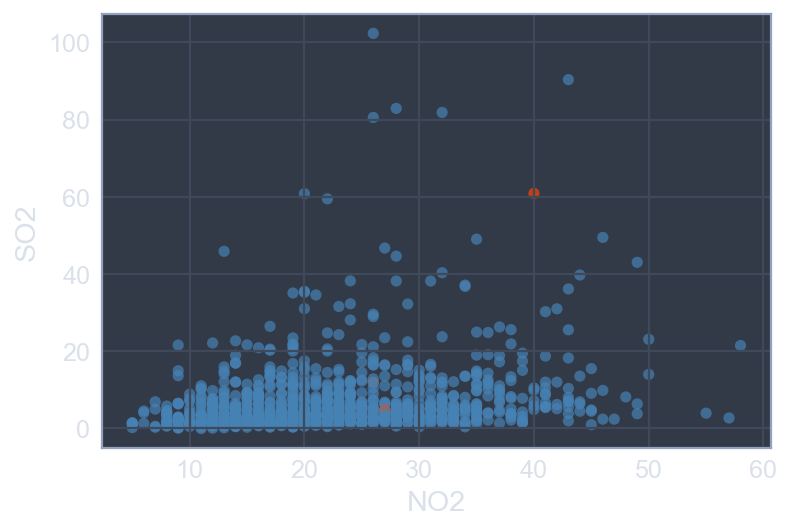

In [4]:
cinci_pollution = pollution[pollution.city == 'Cincinnati']
cinci_colors = ['orangered' if day == 38 else 'steelblue' for day in cinci_pollution.day]

p = sns.regplot(x='NO2', y='SO2', data=cinci_pollution, fit_reg=False,
                scatter_kws={'facecolors': cinci_colors,'alpha': 0.7})

### №1 Hardcoding a highlight

* Modify the list comprehension to color the value corresponding to the 330th day (November 26th) of the year 2014 to `orangered` and the rest of the points to `lightgray`
* Pass the `houston_colors` array to `regplot()` using the `scatter_kws` argument to color the points

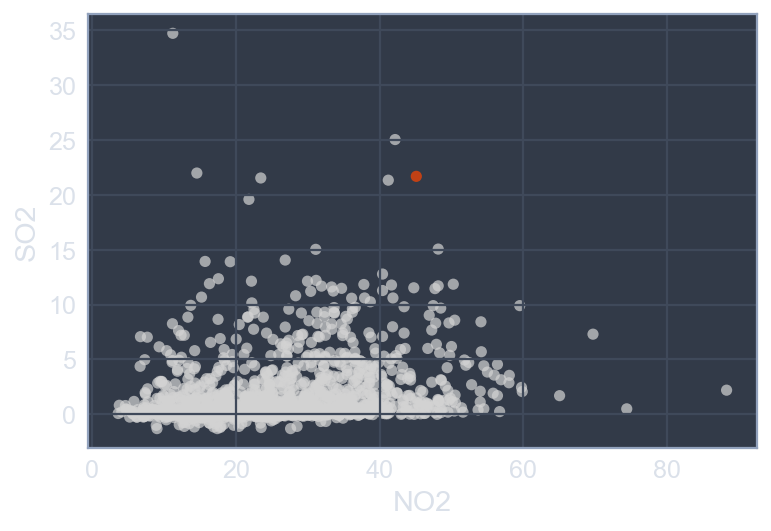

In [5]:
houston_pollution = pollution[pollution.city == 'Houston']
houston_colors = ['orangered' if (day  ==  330) & (year  ==  2014) else 'lightgray'
                  for day, year in zip(houston_pollution.day, houston_pollution.year)]

sns.regplot(x = 'NO2', y = 'SO2', data = houston_pollution, fit_reg = False,
            scatter_kws = {'facecolors': houston_colors, 'alpha': 0.7})
plt.show()

### №2 Programmatically creating a highlight

* Find the value corresponding to the highest observed `O3` value in the `houston_pollution` DataFrame
* Append the column `'point type'` to the houston_pollution DataFrame to mark if the row contains the highest observed `O3`
* Pass this newly created column to the `hue` argument of `sns.scatterplot()` to color the points

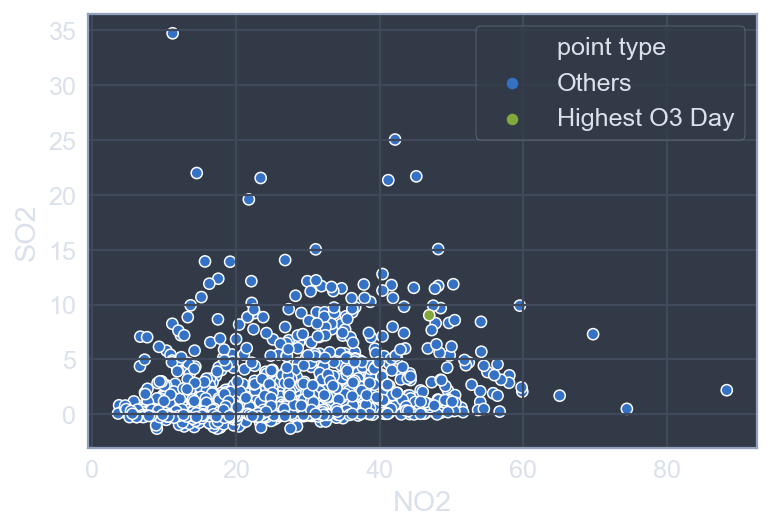

In [6]:
houston_pollution = pollution[pollution.city  ==  'Houston'].copy()
max_O3 = houston_pollution.O3.max()
houston_pollution['point type'] = ['Highest O3 Day' if O3  ==  max_O3 else 'Others'
                                   for O3 in houston_pollution.O3]

sns.scatterplot(x = 'NO2', y = 'SO2', hue = 'point type', data = houston_pollution)
plt.show()

## 2. Comparing groups

### What does this mean?

* Values generally higher?
* Distribution of values wider? Narrower?
* Crucial for representing your data

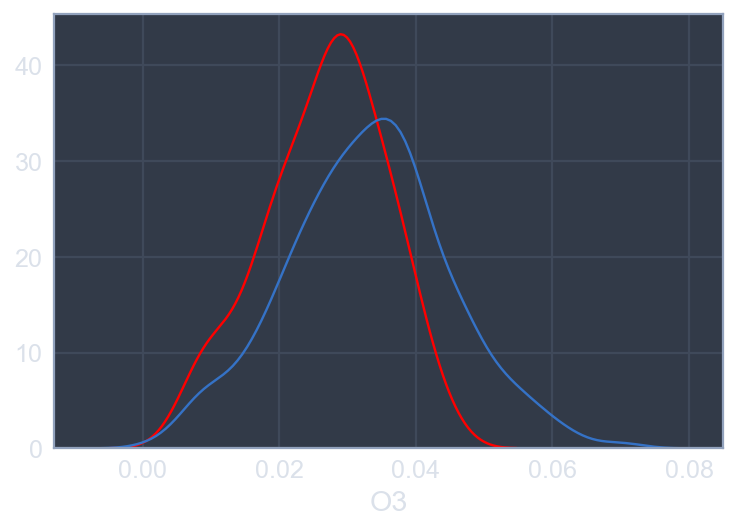

In [7]:
pollution_nov = pollution[pollution.month == 10]
sns.distplot(pollution_nov[pollution_nov.city == 'Denver'].O3, hist=False, color ='red')
sns.distplot(pollution_nov[pollution_nov.city != 'Denver'].O3, hist=False)
plt.show()

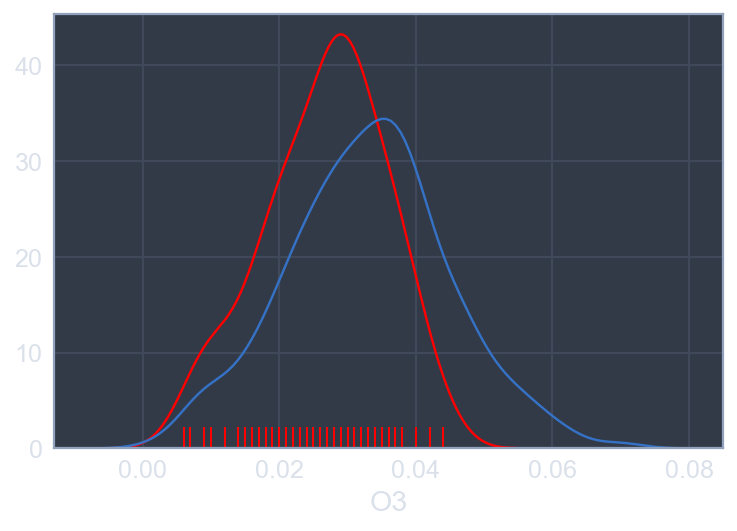

In [8]:
# Enable rugplot
sns.distplot(pollution_nov[pollution_nov.city == 'Denver'].O3,
             hist=False, color='red', rug=True )
sns.distplot(pollution_nov[pollution_nov.city != 'Denver'].O3, hist=False)
plt.show()

### The beeswarm plot

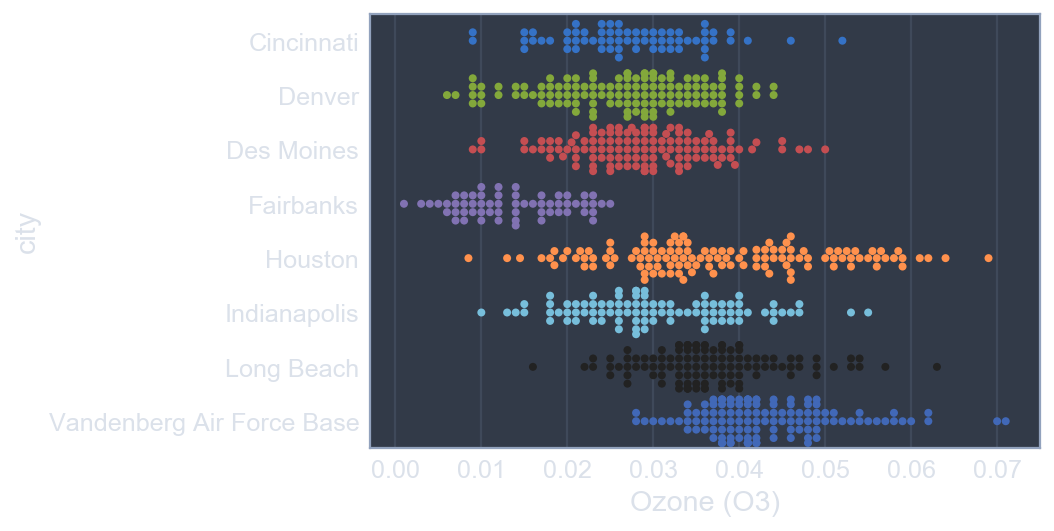

In [9]:
pollution_nov = pollution[pollution.month == 10]
sns.swarmplot(y='city', x='O3', data=pollution_nov, size=4)
plt.xlabel('Ozone (O3)')
plt.show()

### №3 Comparing with two KDEs

* Filter the data in the first `sns.kdeplot()` call to include only the year `2012`
* Shade under the first KDE with the `shade` argument
* Add the label `'2012'` for the plot legend
* Repeat the first three steps for second `sns.kdeplot()` call, but filter the data to not include `2012`. Use the label `'other years'`

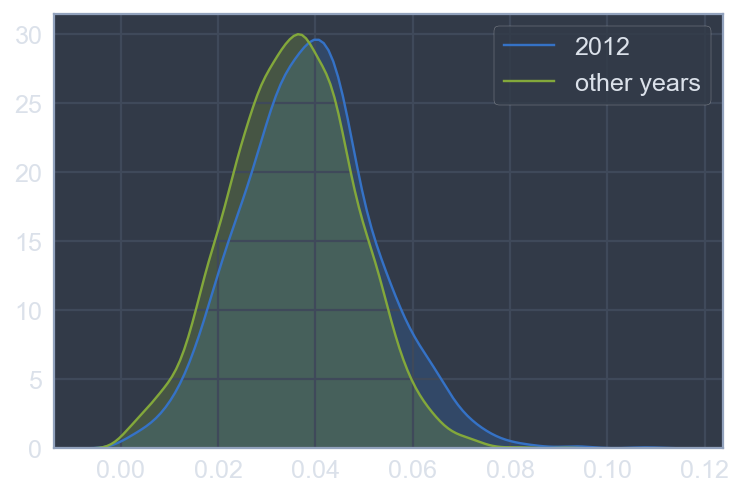

In [10]:
sns.kdeplot(pollution[pollution.year == 2012].O3, shade = True, label = '2012')
sns.kdeplot(pollution[pollution.year != 2012].O3, shade = True, label = 'other years')
plt.show()

### №4 Improving your KDEs

* Turn off the histogram overlay for the first plot`
* Make the Vandenberg plot `'steelblue'`
* Turn on rug plot functionality in the Vandenberg plot
* Remove histogram from the non-Vandenberg plot and set its color to `'gray'`

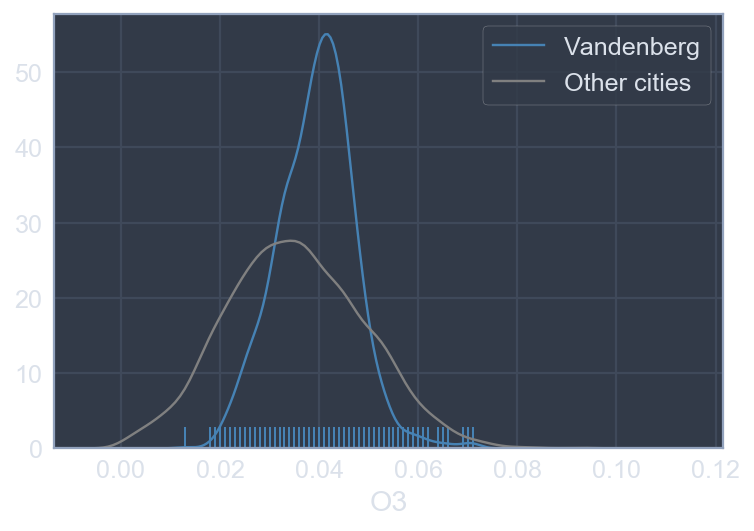

In [11]:
sns.distplot(pollution[pollution.city == 'Vandenberg Air Force Base'].O3, 
             label = 'Vandenberg', hist = False,
             color = 'steelblue', rug = True)
sns.distplot(pollution[pollution.city != 'Vandenberg Air Force Base'].O3, 
             label = 'Other cities', hist = False, color = 'gray')
plt.show()

### №5 Beeswarms

* Subset the `pollution` data to include just the observations in March
* Plot the `O3` levels as the continuous value in the `swarmplot()`
* Decrease the point size to `3` to avoid crowding of the points
* Title the plot `'March Ozone levels by city'`

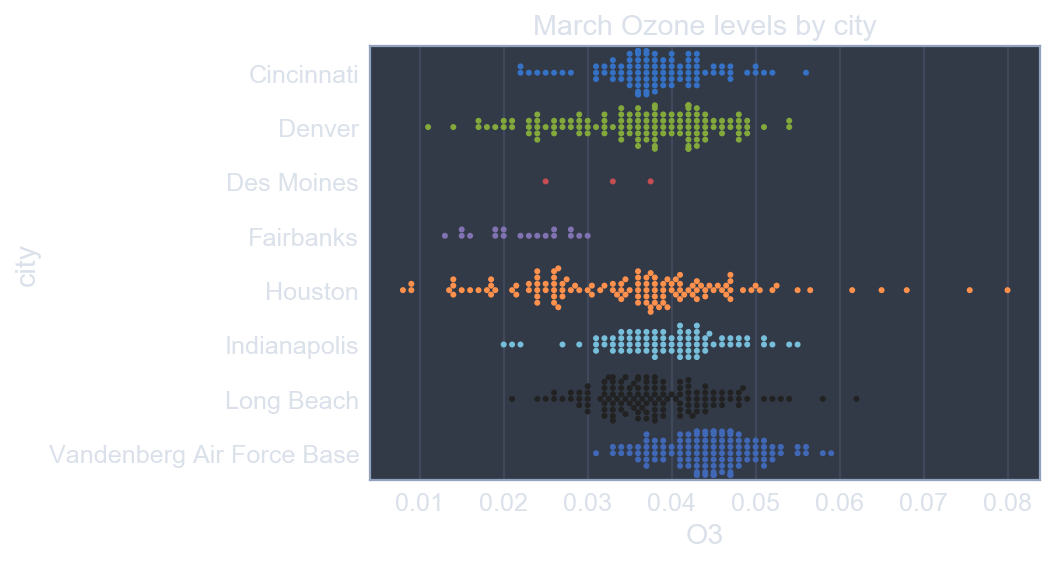

In [12]:
pollution_mar = pollution[pollution.month == 3]

sns.swarmplot(x = 'O3', y = 'city', data = pollution_mar, size = 3)
plt.title('March Ozone levels by city')
plt.show()

## 3. Annotations

### What annotations add

* Compact and efcient communication
* Opportunity to supply deeper insight to data

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/What_annotations_add.png' alt='What annotations add' width=400 align='left'>

### When to use annotations

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/When_to_use_annotations.png' alt='When to use annotations' width=400 align='left'>

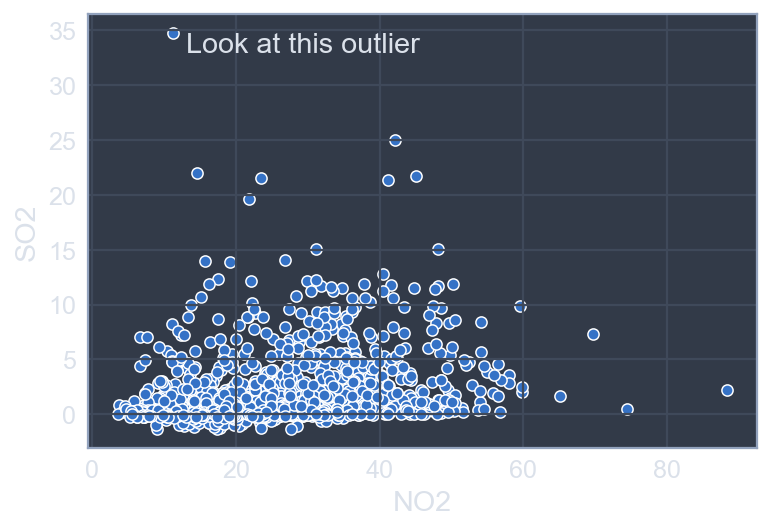

In [13]:
sns.scatterplot(x='NO2', y='SO2', data=houston_pollution)
plt.text(13, 33, 'Look at this outlier', fontdict = {'ha': 'left', 'size': 'x-large'})
plt.show()

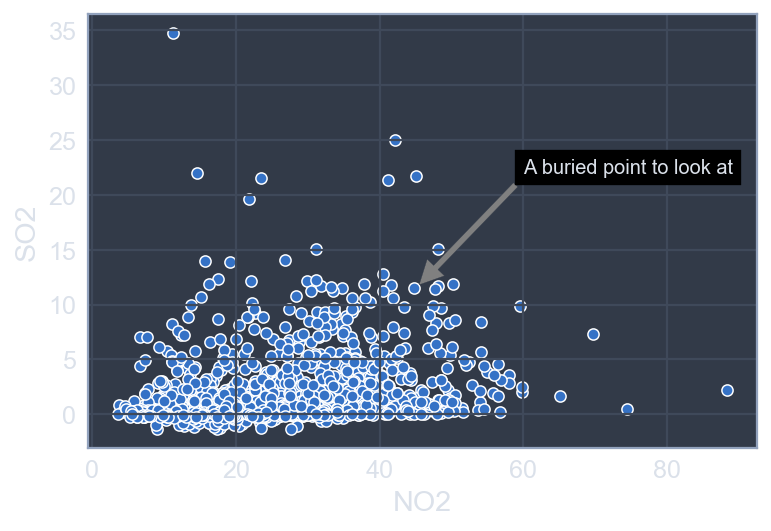

In [14]:
sns.scatterplot(x='NO2', y='SO2', data = houston_pollution)
# Arrow start and annotation location
plt.annotate('A buried point to look at', xy=(45.5,11.8), xytext=(60,22),
             arrowprops={'facecolor':'grey','width': 3}, backgroundcolor='black' )
plt.show()

### №6 A basic text annotation

* Filter the data plotted in scatter plot to just August
* Draw text annotation at `x = 0.57` and `y = 41` to call out the highest `SO2` value
* Label annotation with `'Cincinnati had highest observed\nSO2 value on Aug 11, 2013'` (note the line break)
* Change the font-size to `'large'` for the annotation

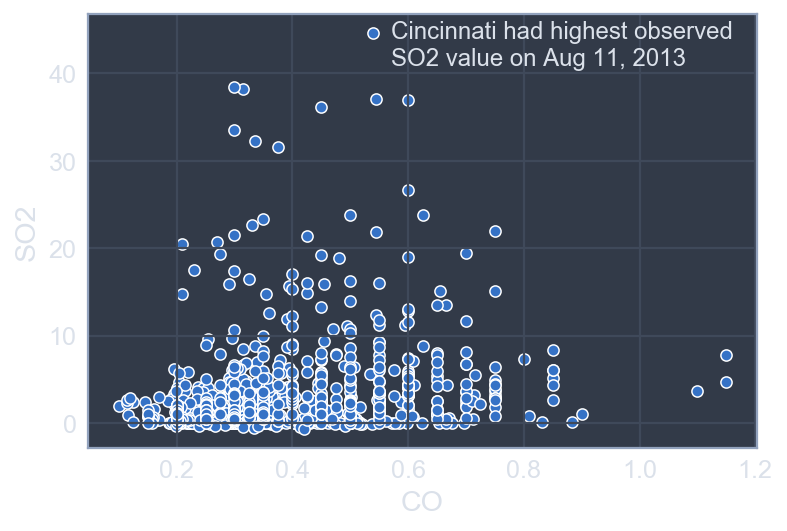

In [15]:
sns.scatterplot(x='CO', y ='SO2', data=pollution[pollution.month  ==  8])

plt.text(0.57, 41, 'Cincinnati had highest observed\nSO2 value on Aug 11, 2013', 
         fontdict={'ha': 'left', 'size': 'large'})
plt.show()

### №7 Arrow annotations

* Grab the row from `jan_pollution` that corresponds to New Years Day 2012 in the city of Long Beach using the pandas' `.query()` method
* Use the `CO` and `NO2` column values from the `lb_newyears` DataFrame to place the endpoint of the arrow
* Place the annotation arrow's text in the bottom left corner of the display at `x = 2`, `y = 15`
`'shrink'` the arrow to `0.03`, so it doesn't occlude the point of interest

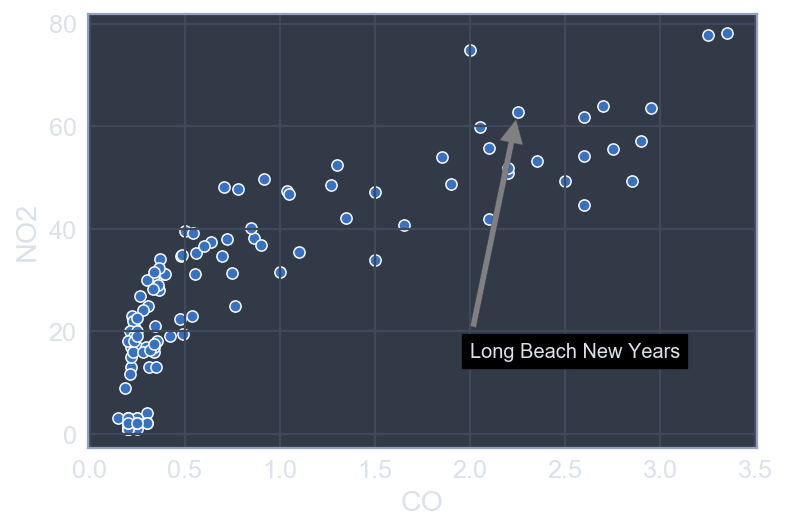

In [16]:
jan_pollution = pollution.query('(month  ==  1) & (year  ==  2012)')
lb_newyears = jan_pollution.query('(day  ==  1) & (city  ==  \'Long Beach\')')

sns.scatterplot(x = 'CO', y = 'NO2', data = jan_pollution)
plt.annotate('Long Beach New Years',
             xy = (lb_newyears.CO, lb_newyears.NO2),
             xytext = (2, 15), 
             arrowprops = {'facecolor':'gray', 'width': 3, 'shrink': 0.03},
             backgroundcolor = 'black')
plt.show()

### №8 Combining annotations and color

1. Using a list comprehension, make a vector of colors for each point with `'orangered'` if the point belongs to Long Beach, and `'lightgray'` if it doesn't

In [17]:
is_lb = ['orangered' if city  ==  'Long Beach' else 'lightgray' for city in pollution['city']]

2. 
    * Use the `is_lb` vector to provide custom colors for each point using the additional keyword argument facecolors in the `scatter_kws` argument
    * In the same `scatter_kws` dictionary, set the opacity to `0.3`

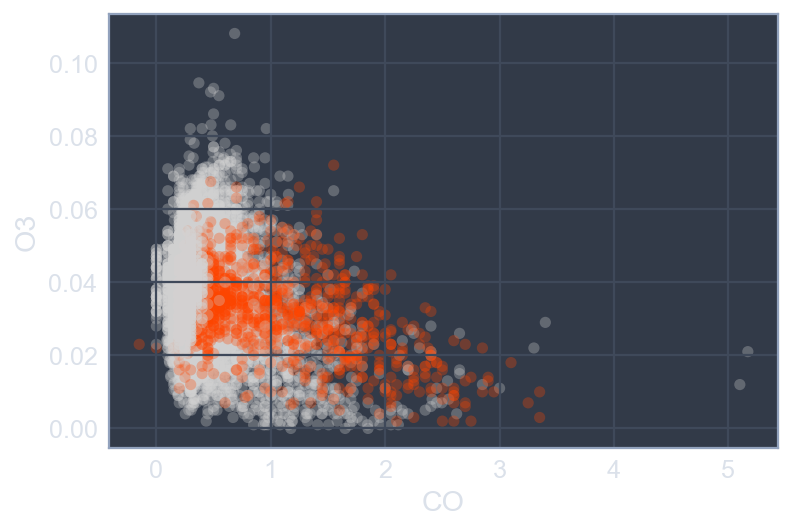

In [18]:
is_lb = ['orangered' if city  ==  'Long Beach' else 'lightgray' for city in pollution['city']]

sns.regplot(x = 'CO', y = 'O3', data = pollution, fit_reg = False, 
            scatter_kws = {'facecolors': is_lb, 'alpha': 0.3})
plt.show() 

3. Add an annotation at `x = 1.6` and `y = 0.072` using the text `'April 30th, Bad Day'` to draw attention to a specific point in the data

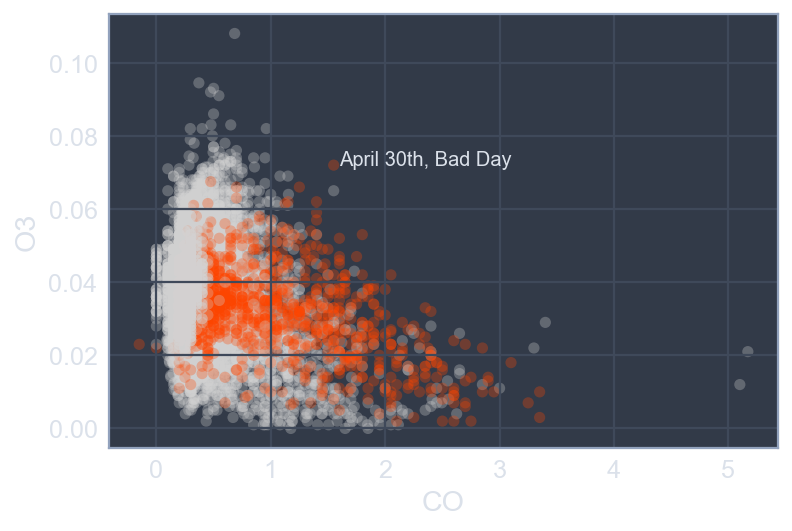

In [19]:
sns.regplot(x = 'CO', y = 'O3', data = pollution, fit_reg = False,
            scatter_kws = {'facecolors':is_lb, 'alpha': 0.3})
plt.text(1.6, 0.072, 'April 30th, Bad Day')
plt.show() 

## Chapter 2. Using color in your visualizations

## 4. Color in visualizations

### How color is used

* Differentiates classes of data
* Encodes continuous values
* Should be used carefully

### Color can be beautiful

* Boring → eye-catching
* Variety is good

* Meaning is often applied to colors via culture/ personal experience

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/us_map.png' alt='US map' width=600 align='left'>

### A remedy for the color-size illusion

In [20]:
ids = [i for i in 'abcdefghijkl']
values = [np.random.randint(15, 16) + np.random.random() for i in range(len(ids))]

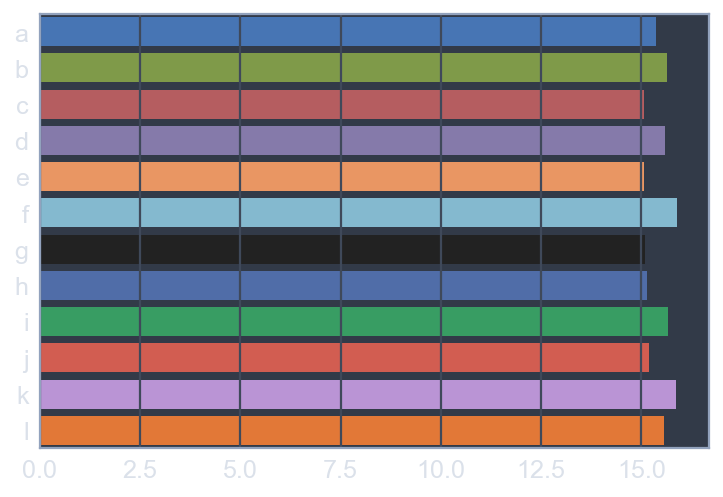

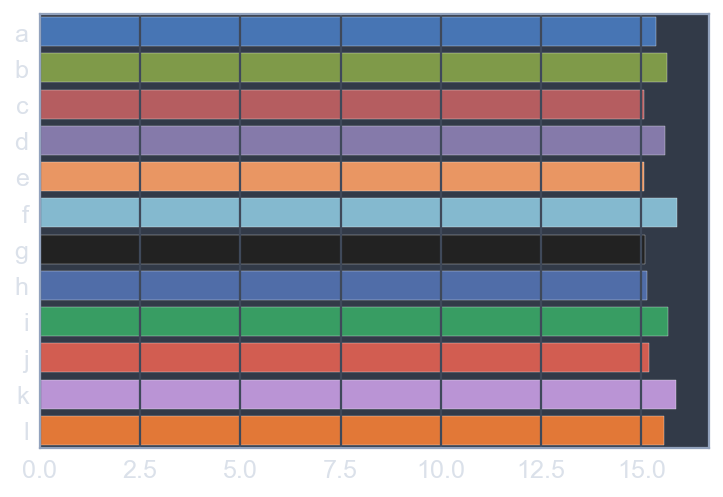

In [21]:
sns.barplot(x = values, y = ids)
plt.show()

sns.barplot(x = values, y = ids, edgecolor='white')
plt.show()

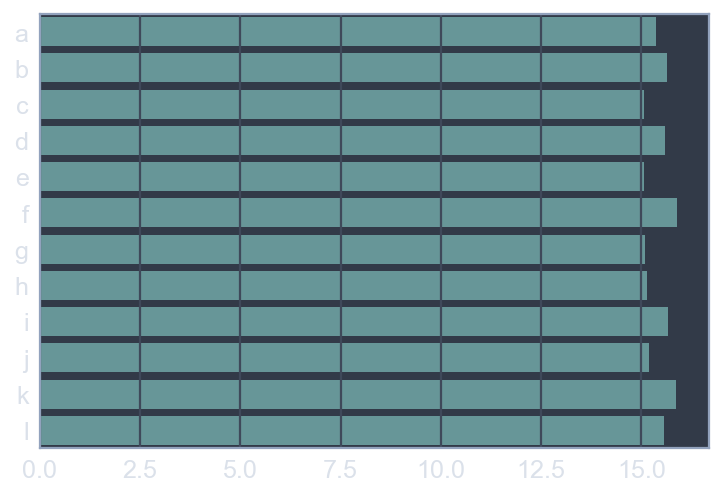

In [22]:
sns.barplot(x=values, y=ids, color='cadetblue')
plt.show()

### №9 Getting rid of unnecessary color

* To set up a chart faceted by the `city`, pass the plotting function the `pollution` data, map the city to the columns, and make the facet three columns wide
* Use the `g.map()` function to map a `scatterplot()` over our grid with the same aesthetic as the original scatter but without the `hue` argument

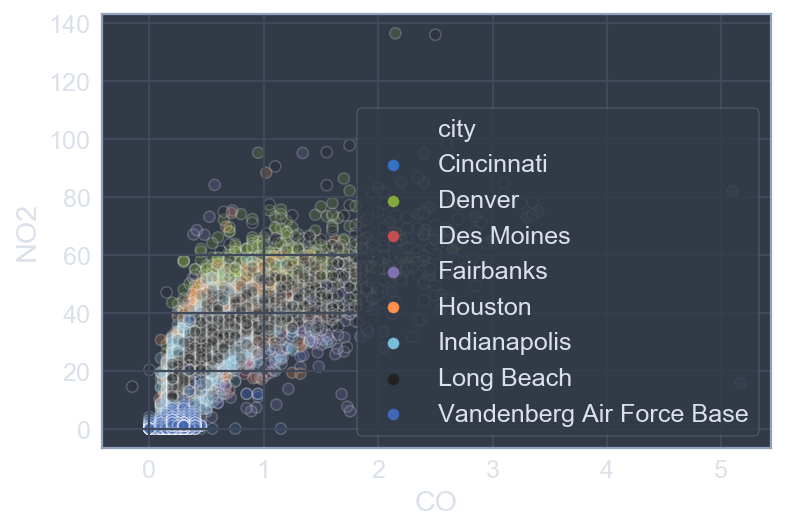

In [23]:
sns.scatterplot('CO', 'NO2', alpha = 0.2, hue = 'city', data = pollution)
plt.show()

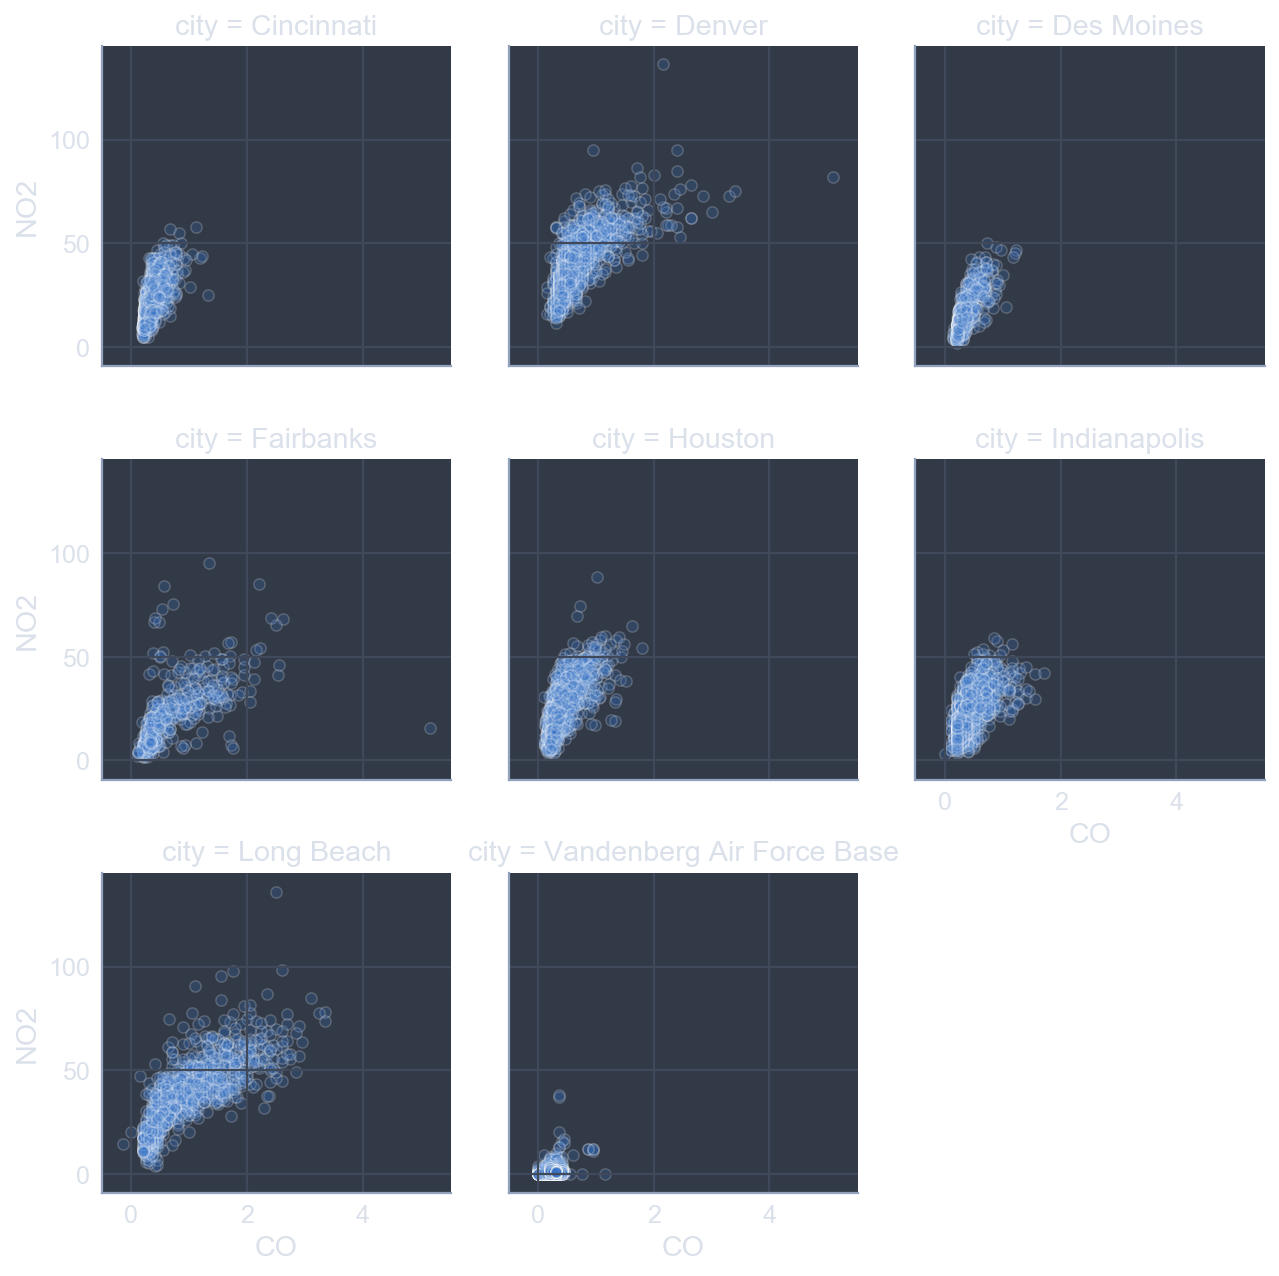

In [24]:
g = sns.FacetGrid(data = pollution, col = 'city', col_wrap = 3)
g.map(sns.scatterplot, 'CO', 'NO2', alpha = 0.2)
plt.show()

### №10 Fixing Seaborn's bar charts

1. Modify the default barplot by adding a black border around each bar

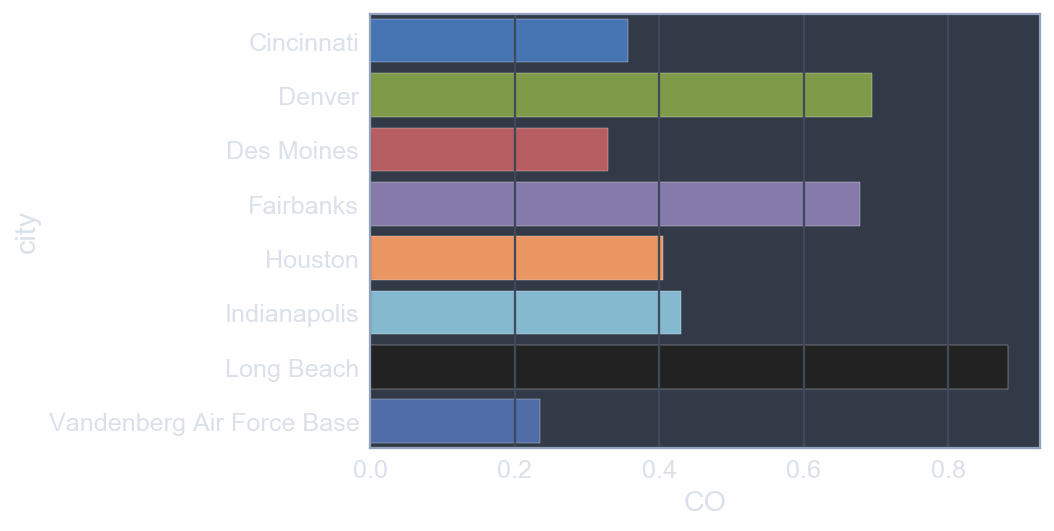

In [25]:
sns.barplot(y = 'city', x = 'CO', estimator = np.mean,
            ci = False, data = pollution, edgecolor = 'white')
plt.show()

2. Now, make your plot more perceptually precise by coloring all bars `'cadetblue'`

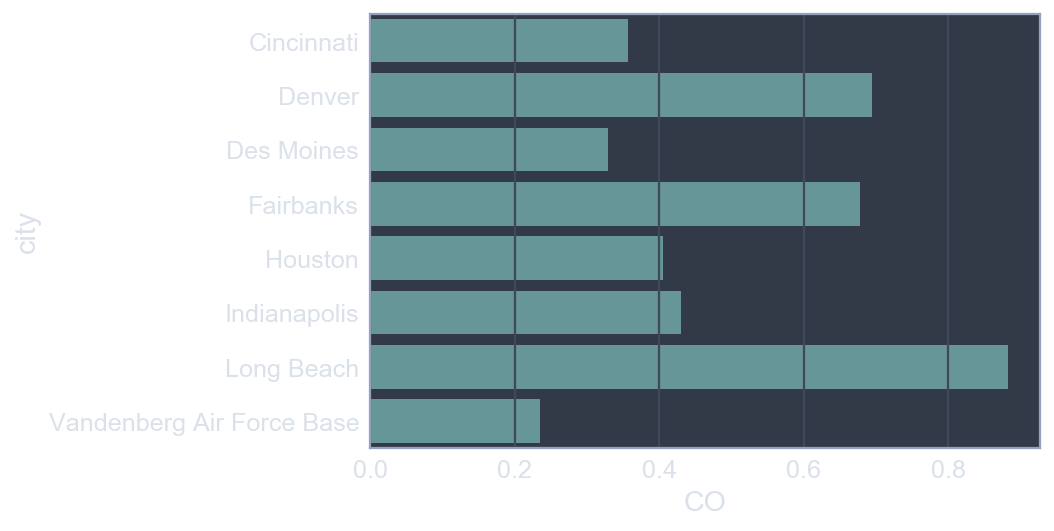

In [26]:
sns.barplot(y = 'city', x = 'CO', estimator = np.mean,
            ci = False, data = pollution, color='cadetblue')
plt.show()

## 5. Continuous color palettes

### Countinuous vs. Not Continuous

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/Countinuous_vs_not_continuous.png' alt='Countinuous vs. Not Continuous' width=600 align='left'>

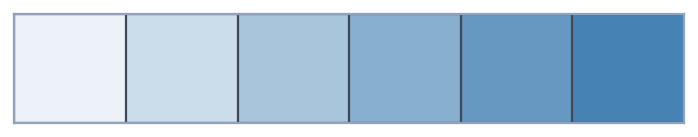

In [27]:
blue_scale = sns.light_palette('steelblue')
sns.palplot(blue_scale)

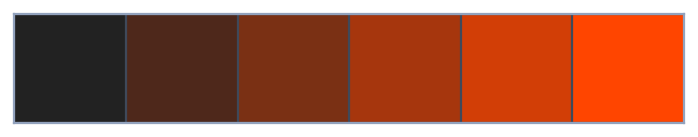

In [28]:
red_scale = sns.dark_palette('orangered')
sns.palplot(red_scale)

### Keep it simple

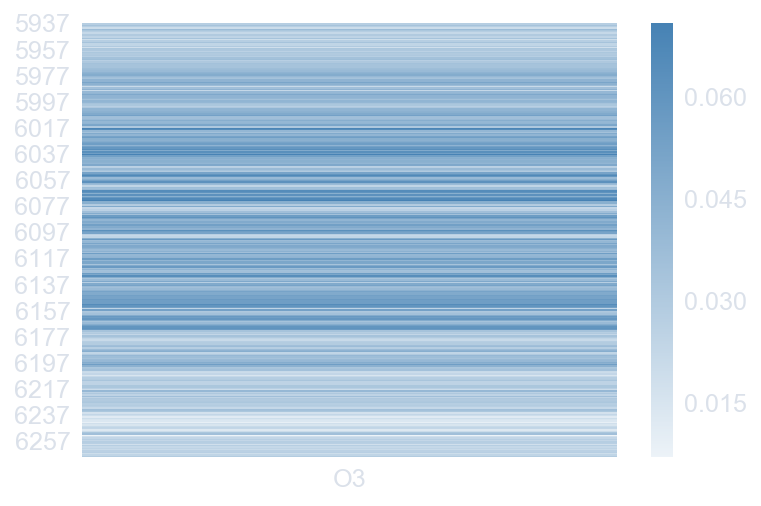

In [29]:
indy_oct = pollution.query('year == 2015 & city == \'Indianapolis\'')
blue_scale = sns.light_palette('steelblue', as_cmap = True)
sns.heatmap(indy_oct[['O3']], cmap = blue_scale)
plt.show()

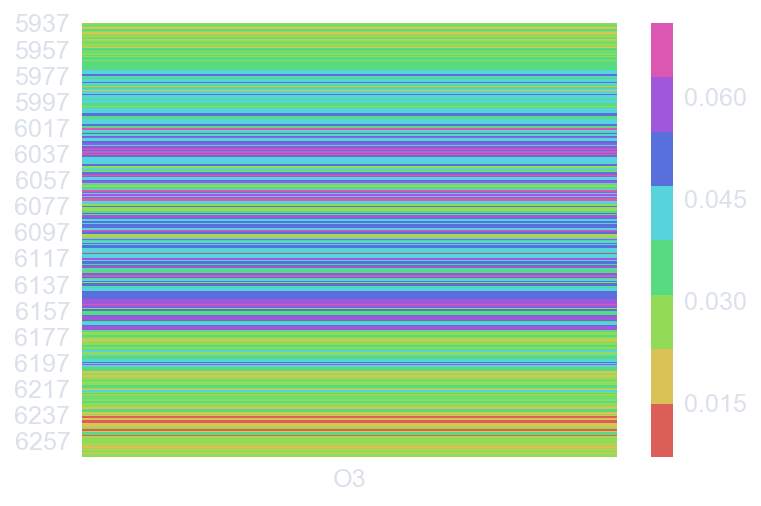

In [30]:
indy_oct = pollution.query('year == 2015 & city == \'Indianapolis\'')
jet_scale = palette = sns.color_palette('hls', 8)
sns.heatmap(indy_oct[['O3']], cmap = jet_scale)
plt.show()

### Be aware of color blindness

* Avoid transitions between green and red
* Palettes that use intensity are safer

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/Be_aware_of_color_blindness.png' alt='Be aware of color blindness' align='left' width=300>

### Encoding neutral values

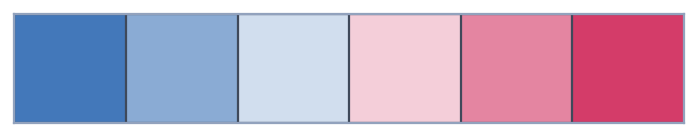

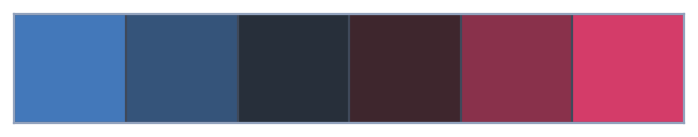

In [31]:
pal_light = sns.diverging_palette(250, 0)
pal_dark = sns.diverging_palette(250, 0, center='dark')

sns.palplot(pal_light)
sns.palplot(pal_dark)

```python
plt.style.use('seaborn-white')
light_palette = sns.light_palette('orangered')
sns.scatterplot(x='CO', y='NO2', hue='O3', data=lb_2012,
                palette=light_palette)
```

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/Low_values.png' alt='Low values' width=400 align='left'>

```python
plt.style.use('dark_background')
dark_palette = sns.dark_palette('orangered')
sns.scatterplot(x='CO', y='NO2', hue='O3', data=lb_2012,
                palette = dark_palette)
```

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/Low_values_2.png' alt='Low values' width=400 align='left'>

### №11 Making a custom continuous palette

* Create a palette that continuously maps from white to `'orangered'`
* Map the column for `O3` values to the color of the points
* Pass your created palette to the plotting function

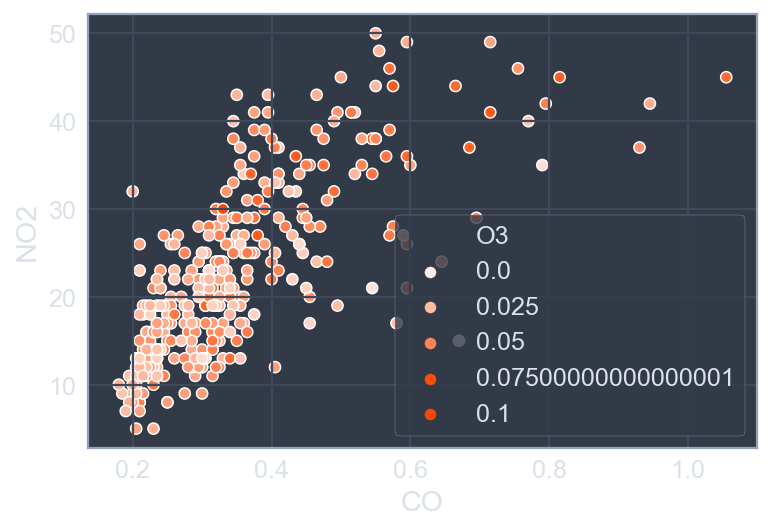

In [32]:
cinci_2014 = pollution.query('city  ==  \'Cincinnati\' & year  ==  2014')

color_palette = sns.light_palette('orangered', as_cmap = True)
sns.scatterplot(x='CO', y='NO2', hue ='O3', data=cinci_2014, palette=color_palette)
plt.show()

### №12 Customizing a diverging palette heatmap

* Pass the diverging palette to `sns.heatmap()`
* Add your neutral value to the heat map
* Set the upper and lower boundaries to the color bar to `-4` and `4` to make legend symmetric

In [33]:
nov_2015_CO = pollution.query('year == 2015 & month == 11').pivot_table(index='city',
                                                                        columns='day',
                                                                        values='CO')
nov_2015_CO.columns = [str(i) for i in range(30)]

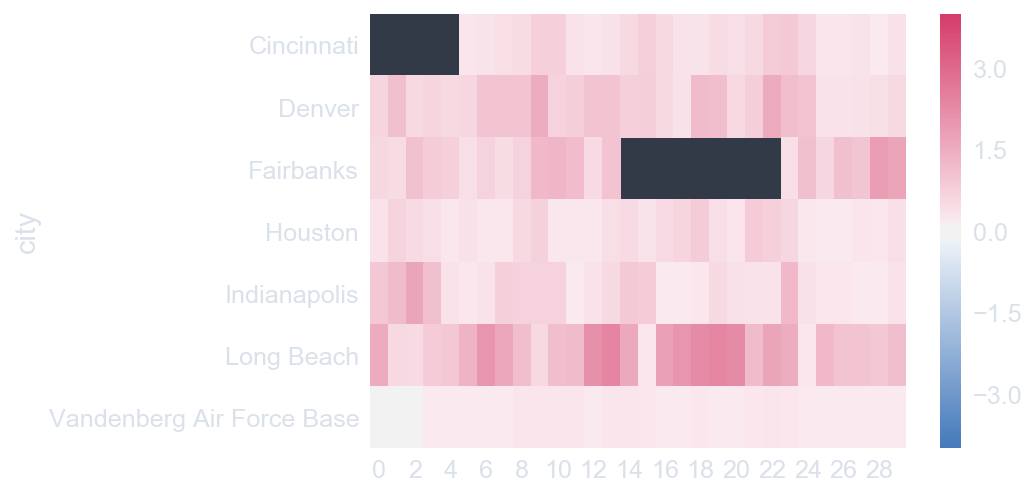

In [34]:
color_palette = sns.diverging_palette(250, 0, as_cmap = True)
sns.heatmap(nov_2015_CO, center=0, cmap=color_palette, vmin=-4, vmax=4)
plt.yticks(rotation = 0)
plt.show()

### №13 Adjusting your palette according to context

* Set the theme of the plot to black with `plt.style.use()`
* Modify the custom palette to be black for the middle value instead of white

In [35]:
oct_2015_o3 = pollution.query('year == 2015 & month == 10').pivot_table(index='city',
                                                                        columns='day',
                                                                        values='O3')
oct_2015_o3.columns = [str(i) for i in range(31)]

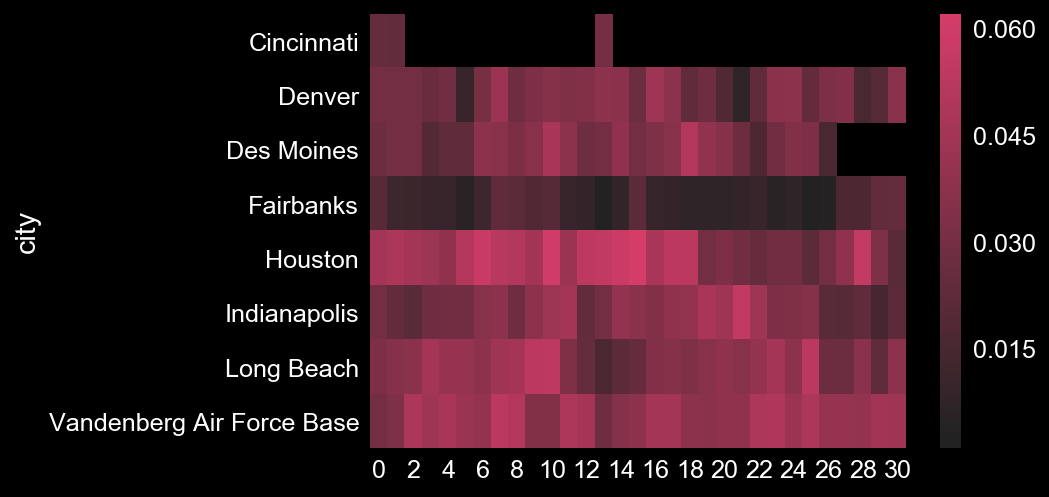

In [36]:
plt.style.use('dark_background')

color_palette = sns.diverging_palette(250, 0, center = 'dark', as_cmap = True)
sns.heatmap(oct_2015_o3, cmap = color_palette, center = 0)
plt.yticks(rotation = 0)
plt.show()

In [37]:
jtplot.style(theme='chesterish')

## 6. Categorical palettes

### Categorical data

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/Categorical_data.png' alt='Categorical data' width=600 align='left'>

### Limits in perception

* Try and limit to 10 or fewer categories
* Keep color-blindness in mind

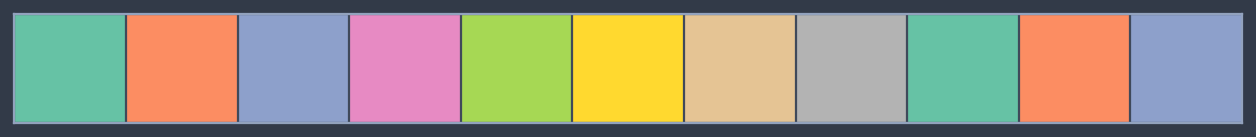

In [38]:
sns.palplot(sns.color_palette('Set2', 11))

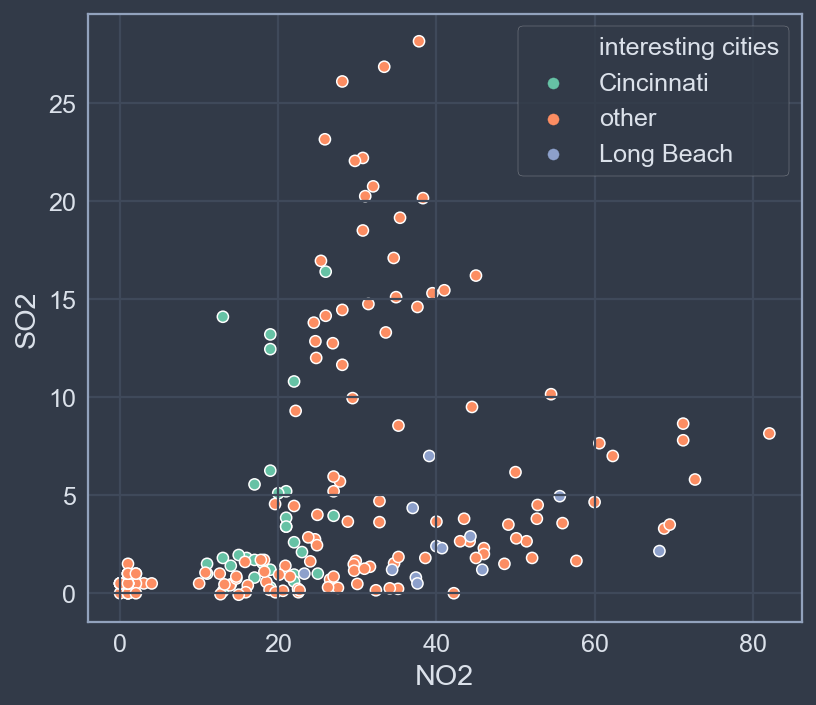

In [39]:
# Assign a new column to dataframe the desired combos
pollution['interesting cities'] = [x if x in ['Long Beach', 'Cincinnati'] 
                                   else 'other' for x in pollution['city'] ]

sns.scatterplot(x='NO2', y='SO2', hue ='interesting cities', palette='Set2',
                data=pollution.query('year == 2014 & month == 12'))

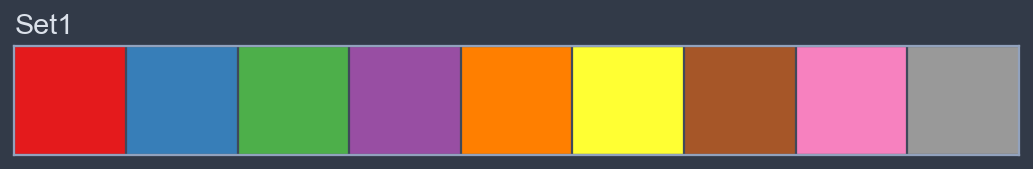

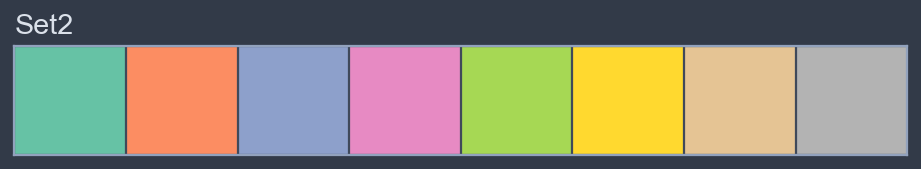

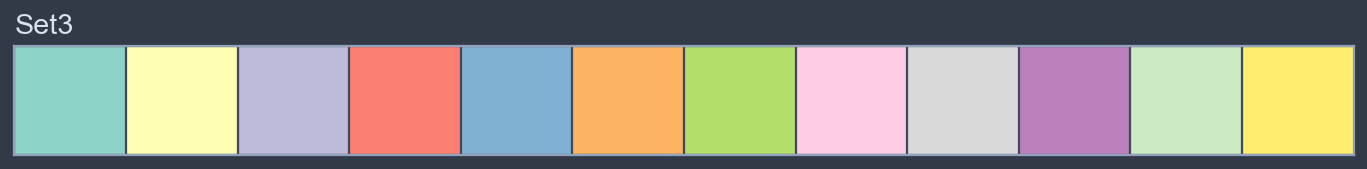

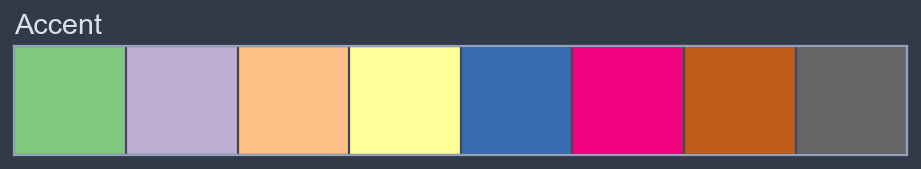

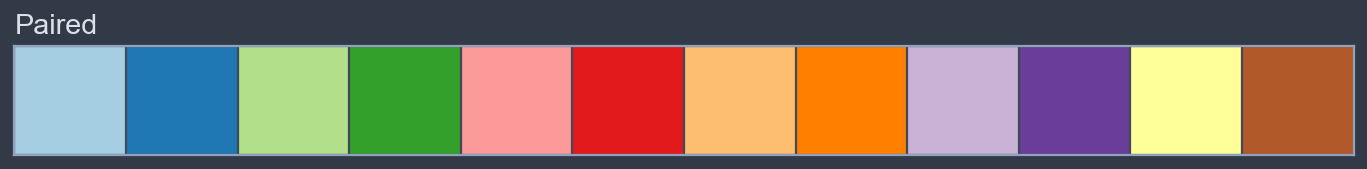

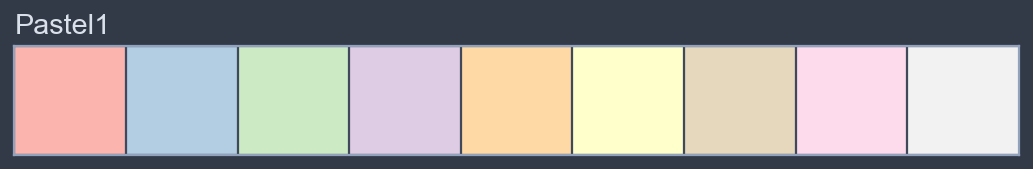

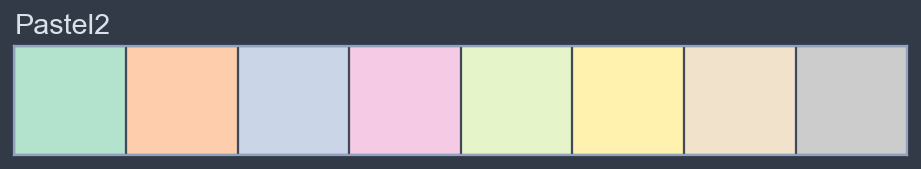

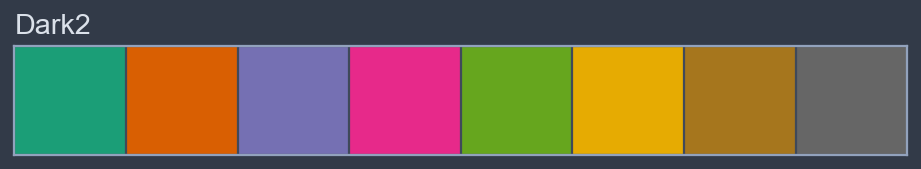

In [40]:
colorbrewer_palettes = ['Set1', 'Set2', 'Set3', 'Accent', 'Paired', 
                        'Pastel1', 'Pastel2', 'Dark2']

for pal in colorbrewer_palettes:
    sns.palplot(pal=sns.color_palette(pal))
    plt.title(pal, loc ='left')

### Ordinal data (a)

* Has order between classes
* A set number of distinct classes

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/Ordinal_data_(a).png' alt='Quartiles' width=300 align='left'>

### Ordinal data (b)

* Has order between classes
* A set number of distinct classes

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/Ordinal_data_(b).png' alt='Days of the Week' width=300 align='left'>

### Ordinal data (c)

* Has order between classes
* A set number of distinct classes

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/Ordinal_data_(c).png' alt='Relative Scales' width=300 align='left'>

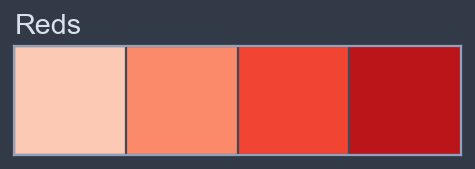

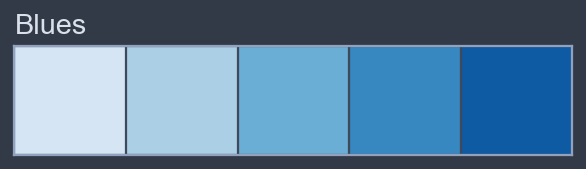

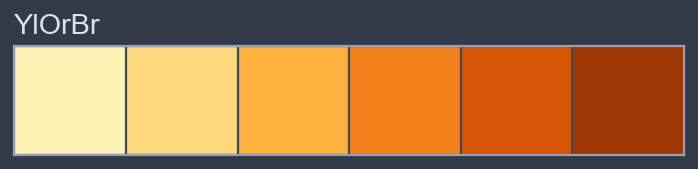

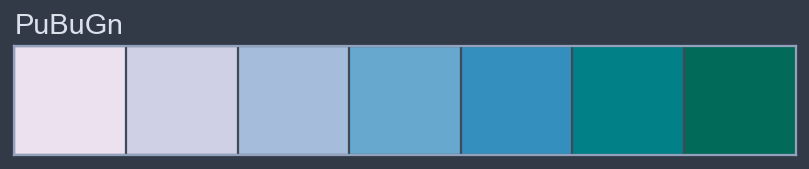

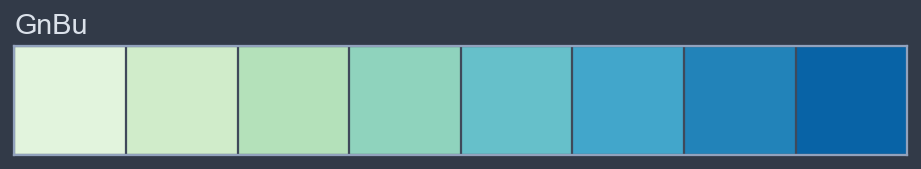

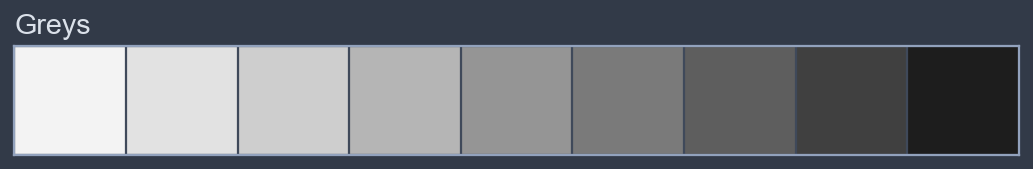

In [41]:
colorbrewer_palettes = ['Reds', 'Blues', 'YlOrBr', 'PuBuGn', 'GnBu', 'Greys']

for i, pal in enumerate(colorbrewer_palettes):
    sns.palplot(pal=sns.color_palette(pal, n_colors=i+4))
    plt.title(pal, loc='left')

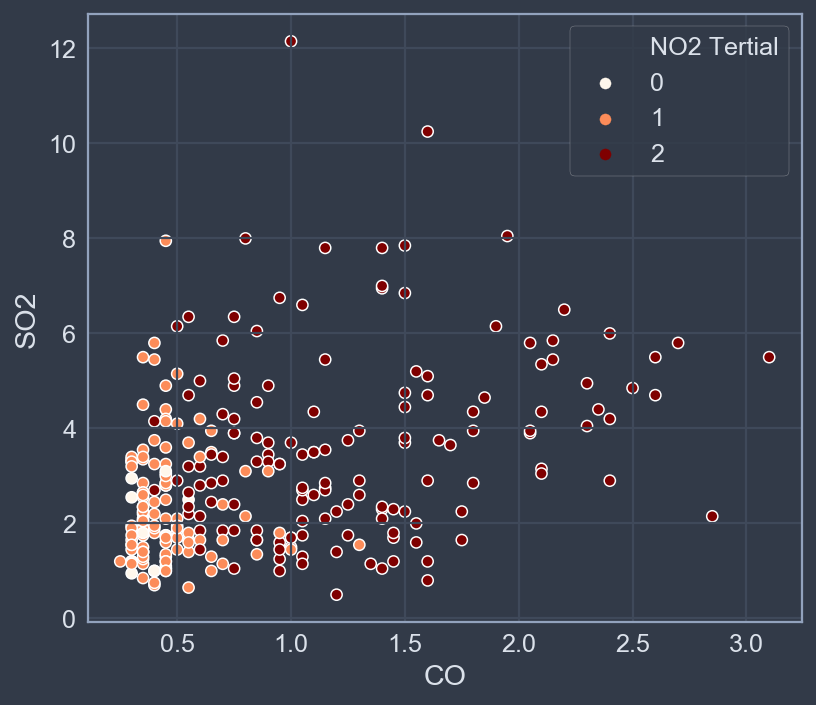

In [42]:
# Make a tertials column using qcut()
pollution['NO2 Tertial'] = pd.qcut(pollution['NO2'], 3, labels = False)

# Plot colored by the computer tertials
sns.scatterplot(x='CO', y='SO2', hue='NO2 Tertial', palette='OrRd',
                data=pollution.query('city == \'Long Beach\' & year == 2014'))
plt.show()

### №14 Using a custom categorical palette

* Query data to January of 2013
* Encode the color of the lines as the city
* Change the palette to the `'Set2'` ColorBrewer palette

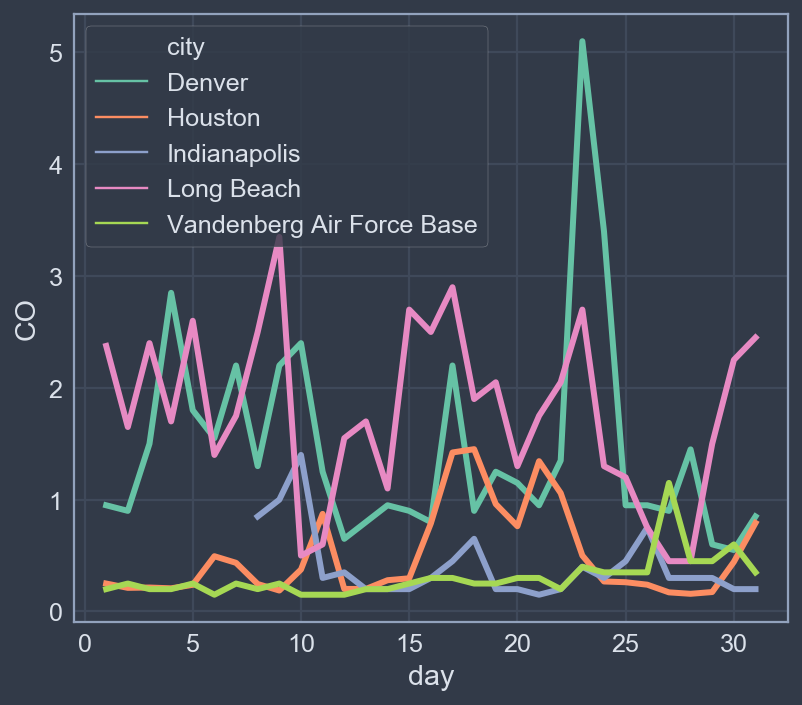

In [43]:
pollution_jan13 = pollution.query('year  ==  2013 & month  ==  1')

sns.lineplot(x = 'day', y = 'CO', palette = 'Set2', hue = 'city', 
             linewidth = 3, data = pollution_jan13)
plt.show()

### №15 Dealing with too many categories

* Modify the list comprehension to isolate the desired combinations of city and pollutant (`wanted_combos`)
* Tell the line plot to color the lines by the newly created `color_cats` column in your DataFrame
* Use the `units` argument to determine how, i.e., from which column, the data points should be connected to form each line
* Disable the binning of points with the `estimator` argument

In [44]:
city_pol_month = pd.read_csv('Improving_Your_Data_Visualizations_in_Python/city_pol_month.csv')

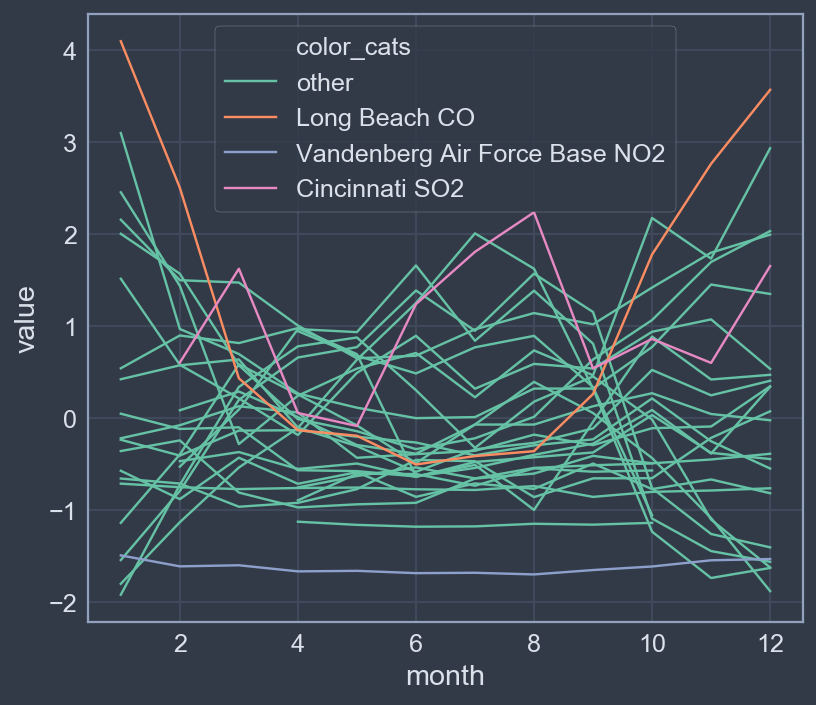

In [45]:
wanted_combos = ['Vandenberg Air Force Base NO2', 'Long Beach CO', 'Cincinnati SO2']
city_pol_month['color_cats'] = [x if x in wanted_combos else 'other' for x in city_pol_month['city_pol']]

sns.lineplot(x = 'month', y = 'value', hue = 'color_cats', units = 'city_pol',
             estimator = None, palette = 'Set2', data = city_pol_month)
plt.show()

### №16 Coloring ordinal categories

* Set the `qcut()` function to break `'CO'` into quartiles
* Map the color of your scatter plot to the new quartile column
* Change the palette to the ColorBrewer palette `'GnBu'`

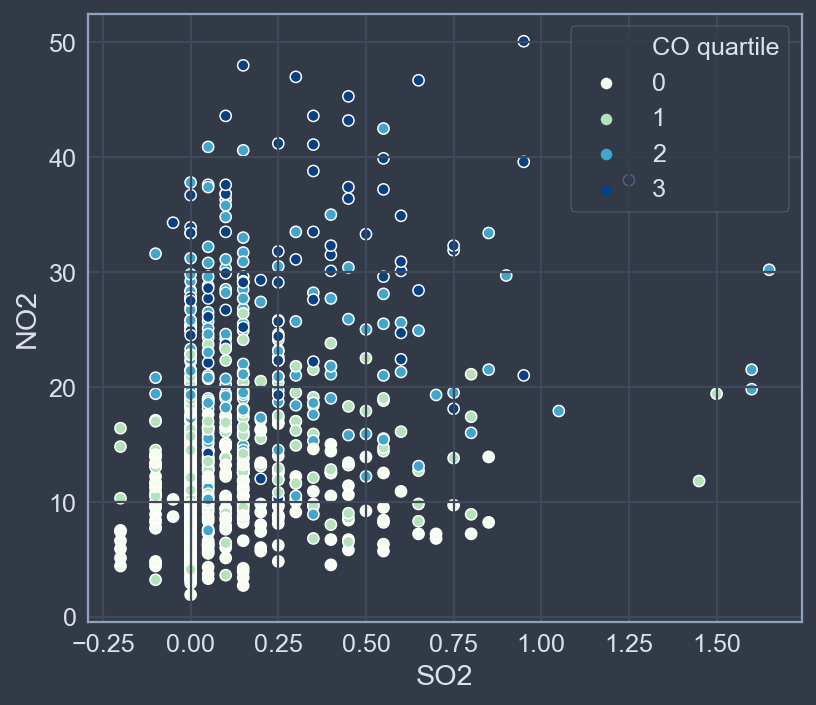

In [46]:
pollution['CO quartile'] = pd.qcut(pollution['CO'], q = 4, labels = False)
des_moines = pollution.query("city  ==  'Des Moines'")

sns.scatterplot(x='SO2', y='NO2', hue='CO quartile', data=des_moines, palette='GnBu')
plt.show()

### №17 Choosing the right variable to encode with color

* Remove `'Indianapolis'`, `'Des Moines'`, `'Cincinnati'`, `'Houston'` from the cities vector
* Swap the encodings of the `city`and `year`variables
* Use the `'BuGn'` ColorBrewer palette to map your colors appropriately for the newly ordinal variable

In [47]:
max_pollutant_values = pd.read_csv('Improving_Your_Data_Visualizations_in_Python/' \
                                   'max_pollutant_values.csv')

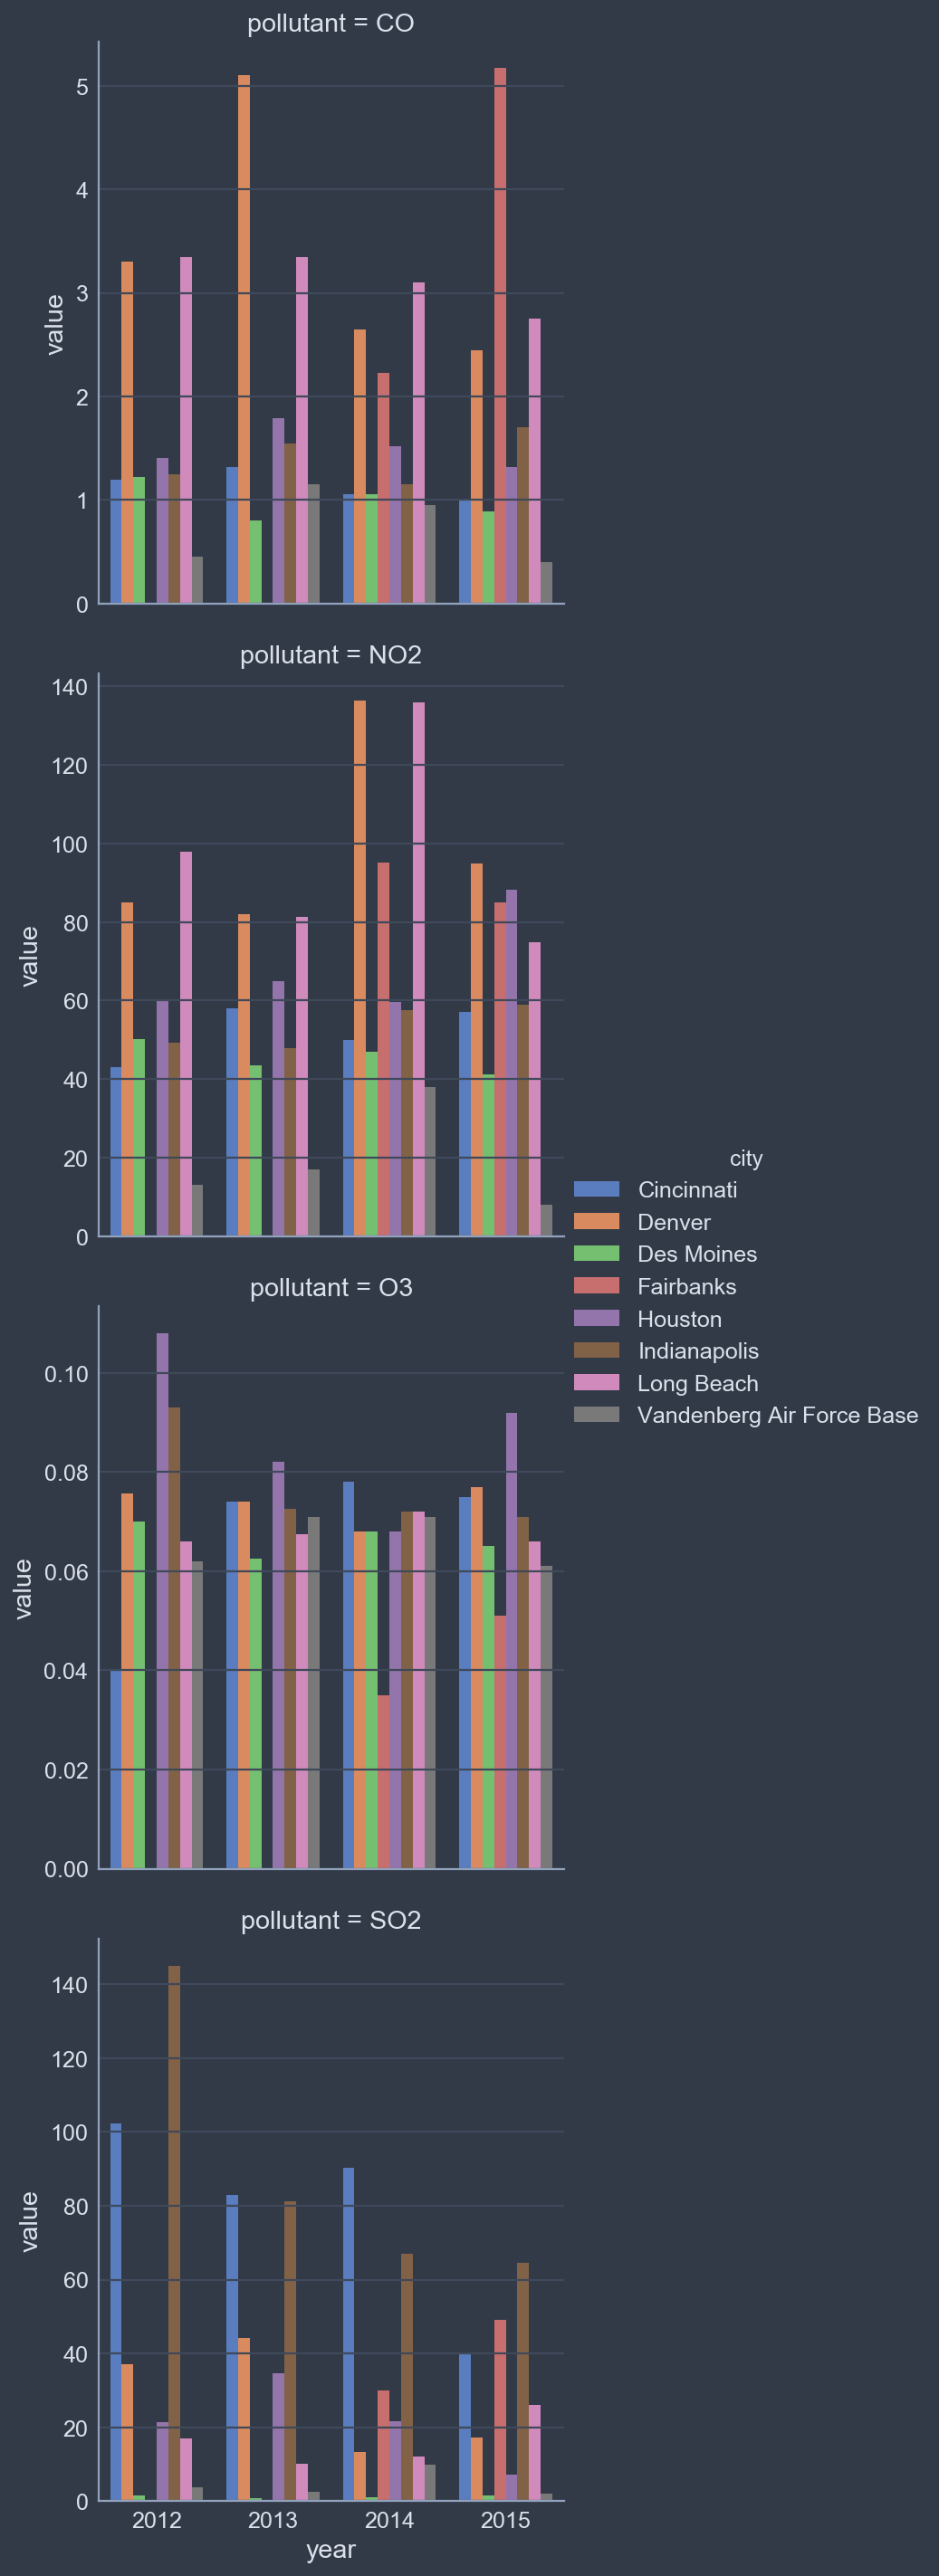

In [48]:
cities = ['Fairbanks', 'Long Beach', 'Vandenberg Air Force Base', 'Denver', 
          'Indianapolis', 'Des Moines', 'Cincinnati', 'Houston']
city_maxes = max_pollutant_values[max_pollutant_values.city.isin(cities)]

sns.catplot(x = 'year', y = 'value', hue = 'city', row = 'pollutant',
            data = city_maxes, palette = 'muted', sharey = False, kind = 'bar')
plt.show()

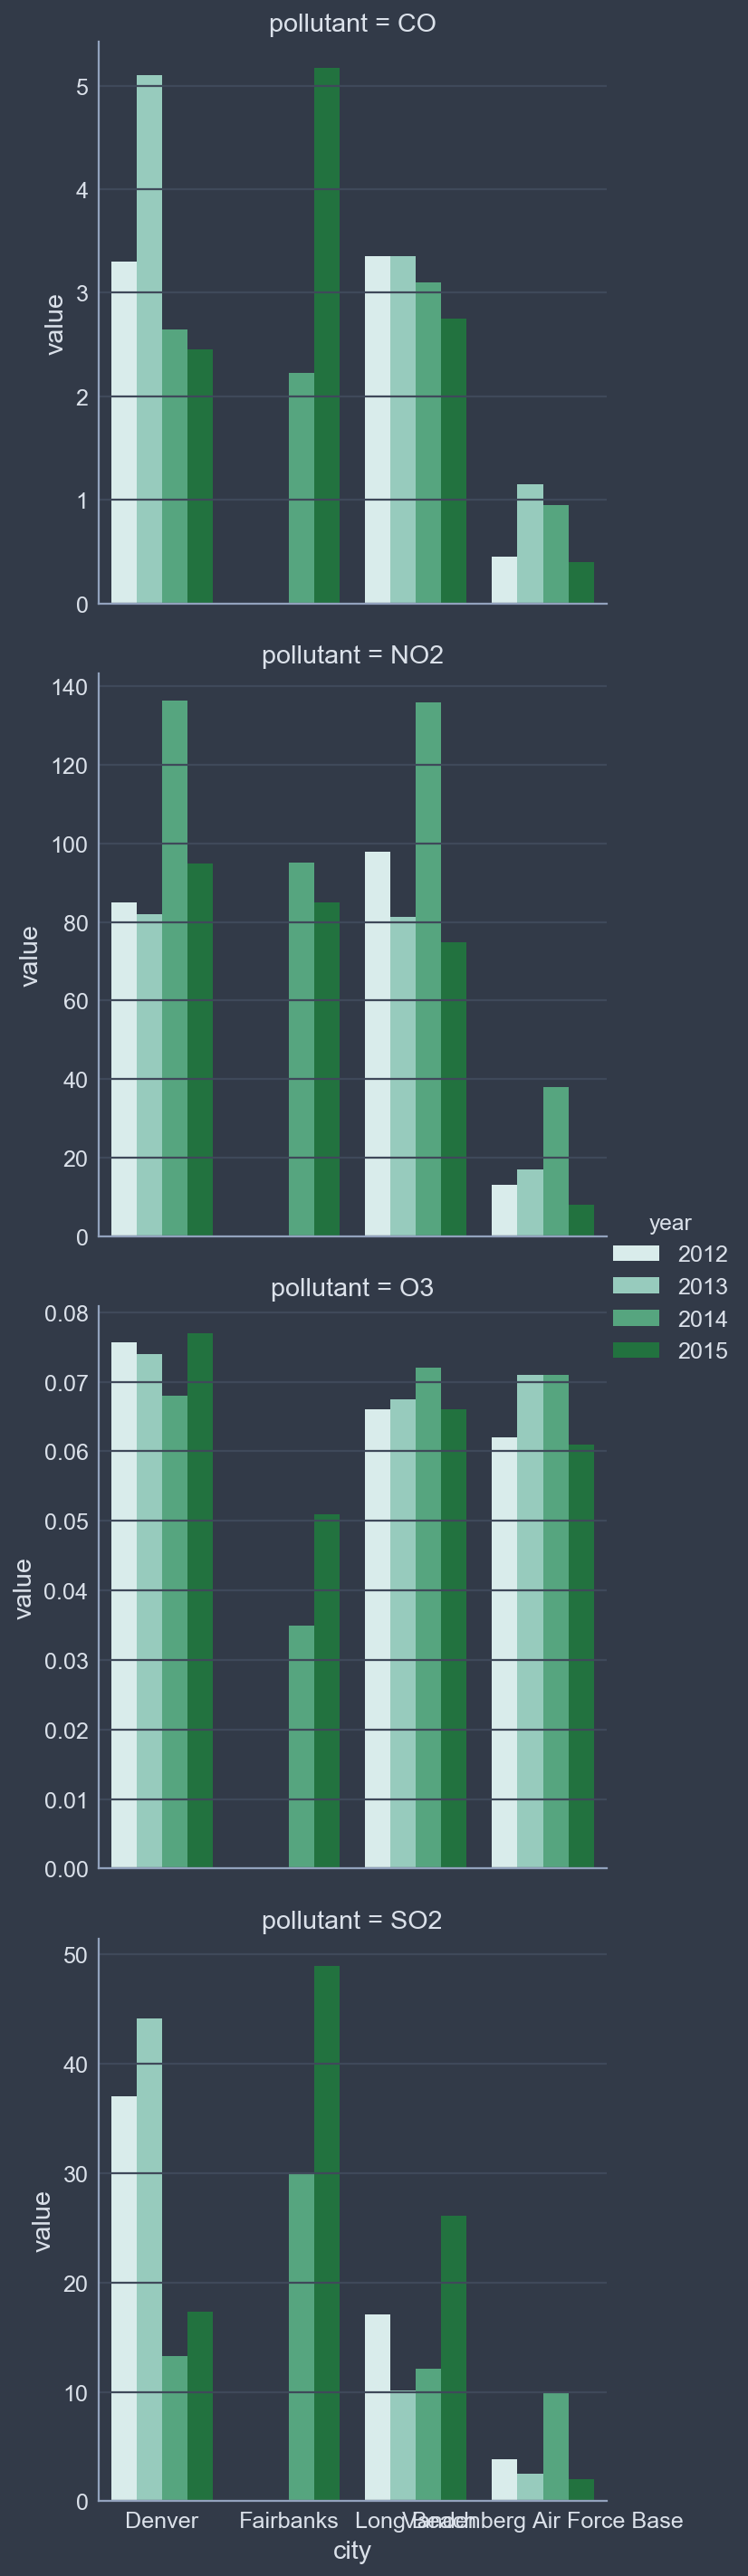

In [49]:
cities = ['Fairbanks', 'Long Beach', 'Vandenberg Air Force Base', 'Denver']
city_maxes = max_pollutant_values[max_pollutant_values.city.isin(cities)]

sns.catplot(x = 'city', hue = 'year', y = 'value', row = 'pollutant',    
            data = city_maxes, palette = 'BuGn', sharey = False, kind = 'bar')
plt.show()

## Chapter 3. Showing uncertainty

## 7. Point estimate intervals

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/What_is_uncertainty.png' alt='What is uncertainty' width=400 align='left'>

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/What_is_uncertainty2.png' alt='What is uncertainty' width=400 align='left'>

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/What_is_uncertainty3.png' alt='What is uncertainty' width=400 align='left'>

### When is uncertainty important?

**Needs uncertainty**
* Estimatesfrom sample
    * Average of a subset
    * Linear model coefcients
    
**Doesn't need uncertainty**
* Facts
    * Counts
    * Summaries of an entire population

### Why is uncertainty important?

* Helps inform condence in estimate
* Necessary for decision making
* Acknowledges limitations of data

### The Confidence Interval

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/The_Confidence_Interval.png' alt='The Confidence Interval' width=400 align='left'>

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/The_Confidence_Interval2.png' alt='The Confidence Interval' width=400 align='left'>

```python
plt.hlines(xmin='lower', xmax='upper', y='y', data=data,
           linewidth=5, color='steelblue', alpha=0.5)
# Point-estimate for reference
plt.plot('est','y','k|', data = data)
```

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/95_CI.png' alt='plot' width=400 align='left'>

### №18 Basic confidence intervals

* Create the lower and upper 95% interval boundaries by subtracting and adding 1.96 standard errors from the mean of estimates
* Pass `pollutant` as the faceting variable to `sns.FacetGrid()`
* Unlink the x-axes of the plots, so intervals are all well-sized
* Pass the constructed interval boundaries to the mapped `plt.hlines()` function

In [50]:
average_ests = pd.read_csv('Improving_Your_Data_Visualizations_in_Python/average_ests.csv')

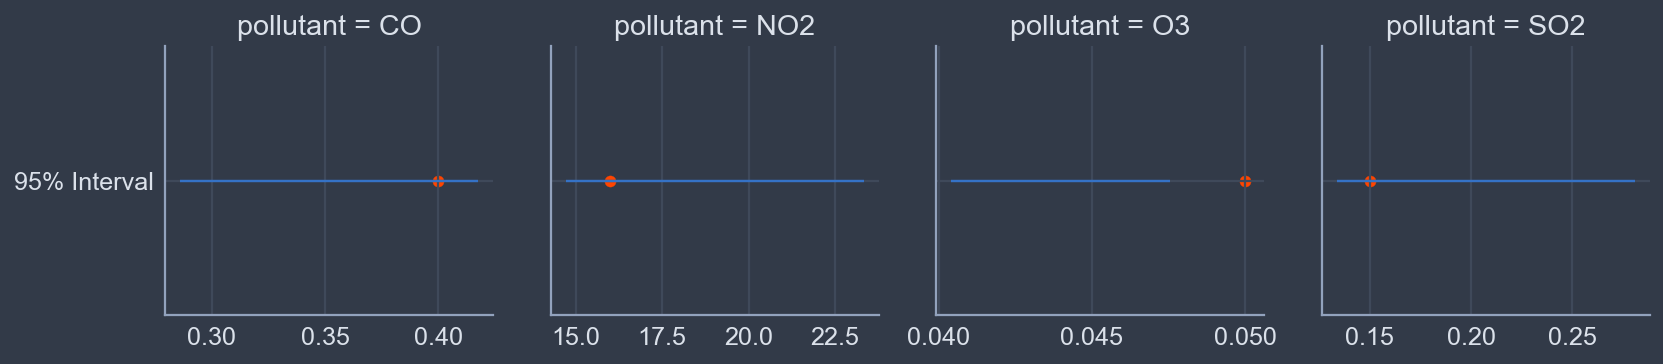

In [51]:
average_ests['lower'] = average_ests['mean'] - 1.96*average_ests['std_err']
average_ests['upper'] = average_ests['mean'] + 1.96*average_ests['std_err']

g = sns.FacetGrid(average_ests, col='pollutant', sharex=False)
g.map(plt.hlines, 'y', 'lower', 'upper')
g.map(plt.scatter, 'seen', 'y', color = 'orangered').set_ylabels('').set_xlabels('') 

plt.show()

### №19 Annotating confidence intervals

* Provide starting and ending limits (columns `lower` and `upper`) for your confidence intervals to `plt.hlines()`
* Set interval thickness to `5`
* Draw a vertical line representing a difference of `0` with `plt.axvline()`
* Color the null line `'orangered'` to make it stand out

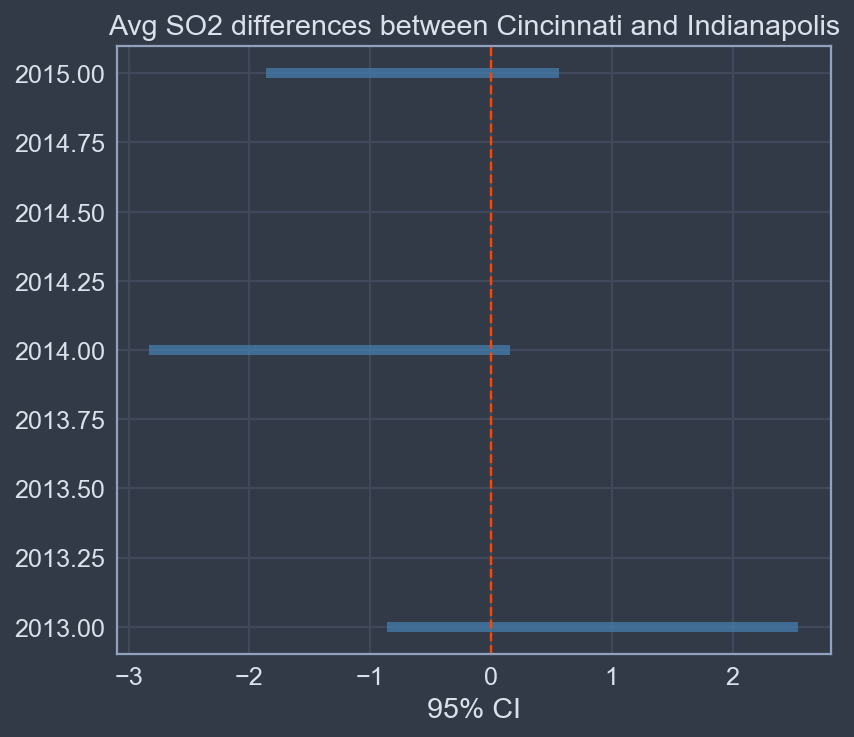

In [52]:
diffs_by_year = pd.read_csv('Improving_Your_Data_Visualizations_in_Python/diffs_by_year.csv')

plt.hlines(y = 'year', xmin = 'lower', xmax = 'upper', linewidth = 5,
           color = 'steelblue', alpha = 0.7, data = diffs_by_year)
plt.plot('mean', 'year', 'k|', data = diffs_by_year)

plt.axvline(x = 0, color = 'orangered', linestyle = '--')

plt.xlabel('95% CI')
plt.title('Avg SO2 differences between Cincinnati and Indianapolis')
plt.show()

## 8. Condence bands

### Continuous estimation functions

* Estimates over a continuous axis
* Often over time
* Have uncertainty and should be plotted as such

### Lots of confidence intervals

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/Lots_of_confidence_intervals.png' alt='Lots of confidence intervals' width=400 align='left'>

### The confidence band

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/The_confidence_band.png' alt='The confidence band' width=400 align='left'>

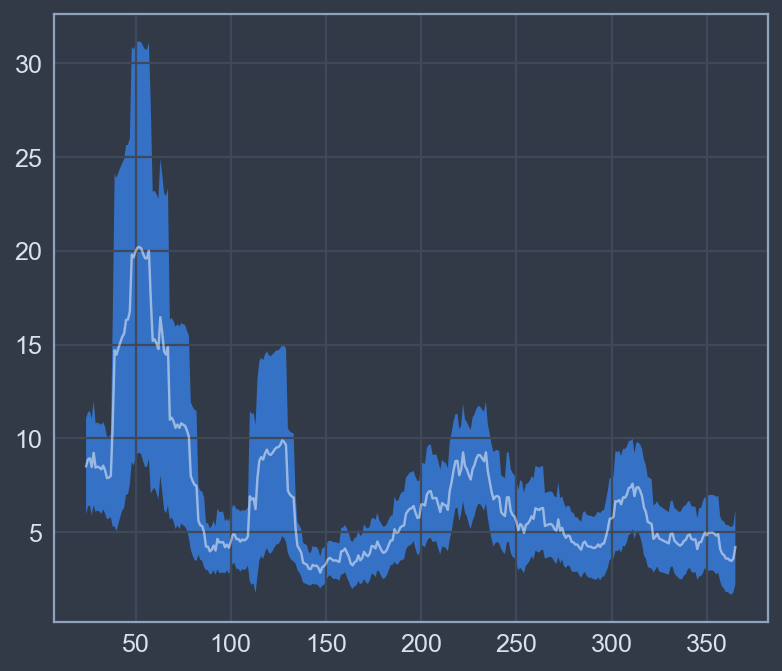

In [53]:
eastern_SO2 = pd.read_csv('Improving_Your_Data_Visualizations_in_Python/eastern_SO2.csv')
cinci_so2 = eastern_SO2.query('city == "Cincinnati"')

plt.fill_between(x='day', y1='lower', y2='upper', data=cinci_so2)
plt.plot('day','mean','w-', alpha=0.5, data=cinci_so2)
plt.show()

### Separate your bands 

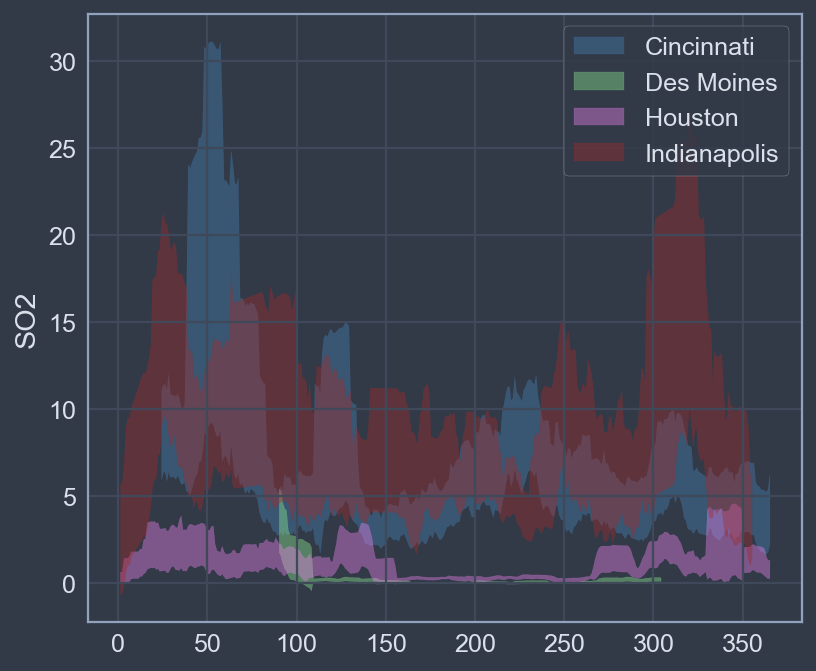

In [54]:
for city, color in [('Cincinnati', 'Steelblue'), ('Des Moines', 'Lightgreen'),
                    ('Houston', 'Violet'), ('Indianapolis', 'Brown')]:
    city_data = eastern_SO2[eastern_SO2.city  ==  city]
    plt.fill_between(x='day', y1='lower', y2='upper', data=city_data,
                     color=color, label=city, alpha=0.4)
    
plt.ylabel('SO2')
plt.legend()
plt.show()

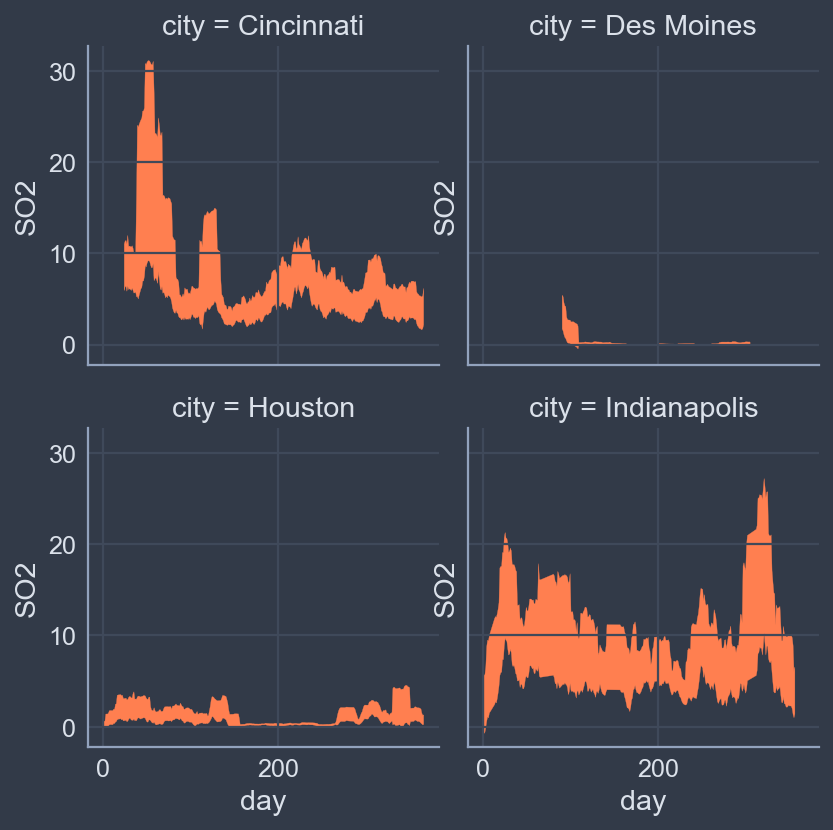

In [55]:
g = sns.FacetGrid(eastern_SO2, col = 'city', col_wrap = 2)
g.map(plt.fill_between, 'day', 'lower', 'upper', color = 'coral')
g.set(ylabel='SO2')
plt.show()

### Cleaning up confidence band comparisons

* No information what happens undeneath
* Clashing colors distract

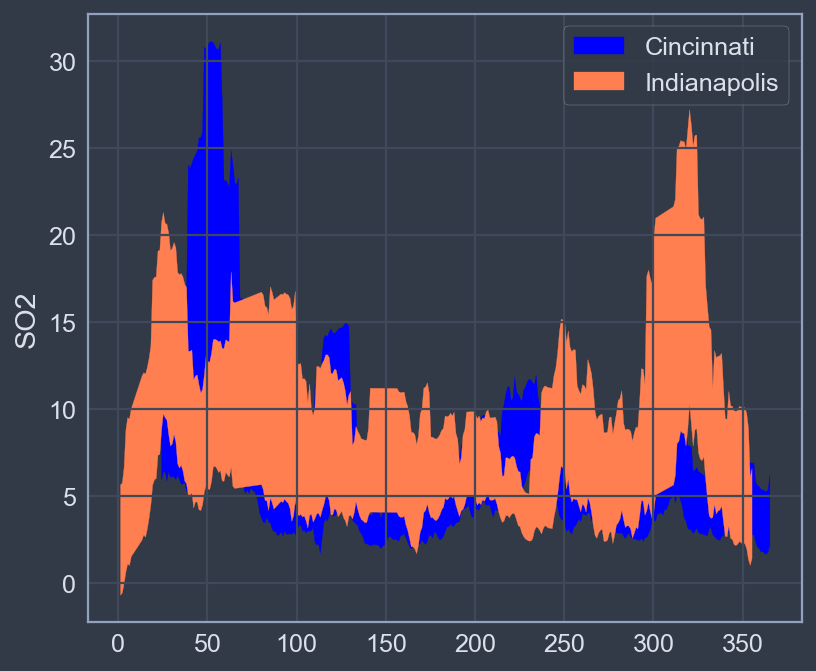

In [56]:
for city, color in [('Cincinnati', 'Blue'), ('Indianapolis', 'Coral')]:
    city_data = eastern_SO2[eastern_SO2.city  ==  city]
    plt.fill_between(x='day', y1='lower', y2='upper', data=city_data, color=color, label=city)
    
plt.ylabel('SO2')
plt.legend()
plt.show()

* `alpha=0.4` -> What happens in overlap is clear
* Well paired colors

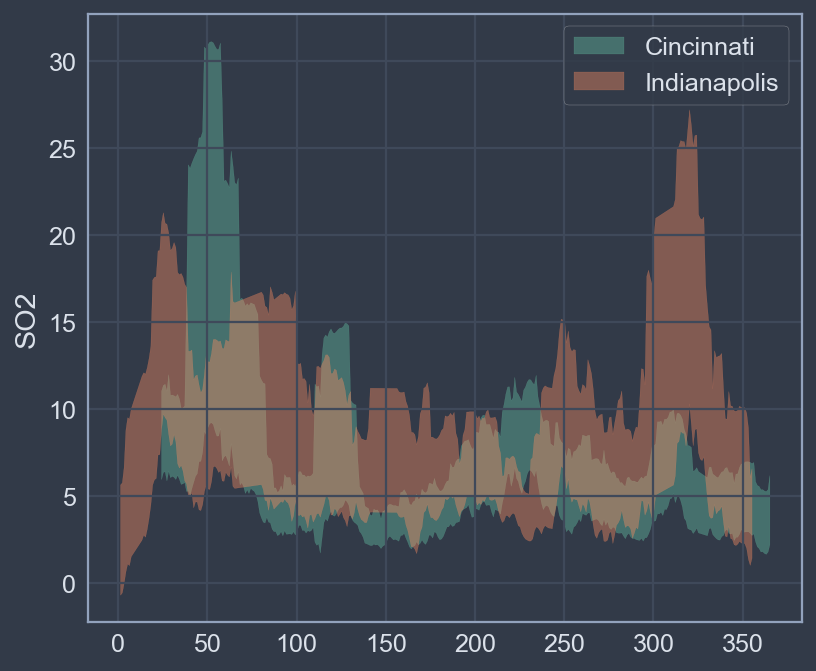

In [57]:
for city, color in [('Cincinnati','#66c2a5'), ('Indianapolis', '#fc8d62')]:
    city_data = eastern_SO2[eastern_SO2.city  ==  city]
    plt.fill_between(x='day', y1='lower', y2='upper', data=city_data,
                     color=color, label=city, alpha=0.4)
    
plt.ylabel('SO2')
plt.legend()
plt.show()

### №20 Making a confidence band

* Construct upper and lower 99% interval bands by adding and subtracting `2.58` standard errors from the mean
* Make the point-estimate line white
* Make the point-estimate line semi-transparent by setting `alpha` to `0.4`
* Tell `plt.fill_between()` what values to fill between for each day

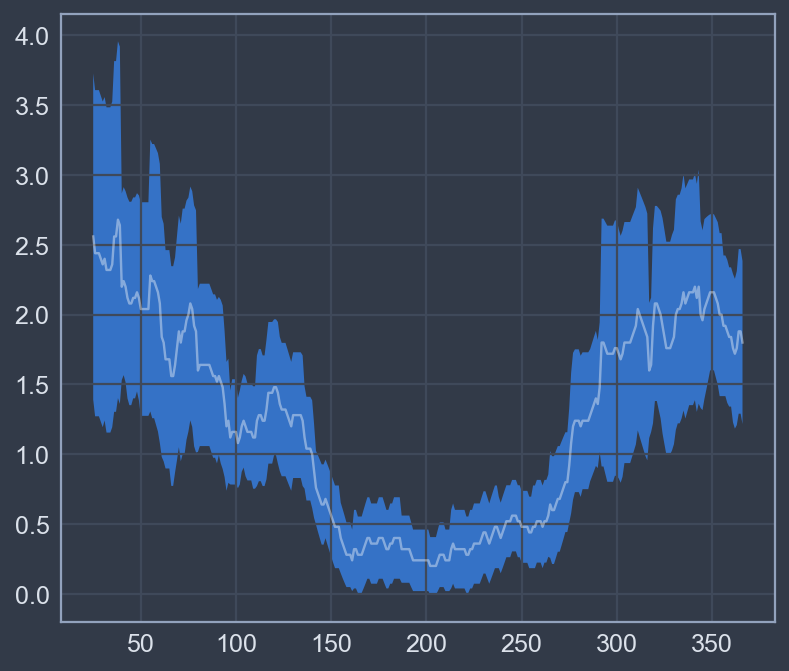

In [58]:
vandenberg_NO2 = pd.read_csv('Improving_Your_Data_Visualizations_in_Python/vandenberg_NO2.csv')

vandenberg_NO2['lower'] = vandenberg_NO2['mean'] - 2.58 * vandenberg_NO2['std_err']
vandenberg_NO2['upper'] = vandenberg_NO2['mean'] + 2.58 * vandenberg_NO2['std_err']

plt.plot('day', 'mean', data=vandenberg_NO2, color='white', alpha=.4)
plt.fill_between(x='day', y1='lower', y2='upper', data=vandenberg_NO2)
plt.show()

### №21 Separating a lot of bands

* Set up a facet grid to separate the plots by the `city` column in `eastern_SO2`
* Send the confidence interval plotting function to `map()`
* Color the confidence intervals `'coral'`
* Help the overlaid mean line drawn with `g.map(plt.plot,...)` stand out against the confidence bands by coloring it white

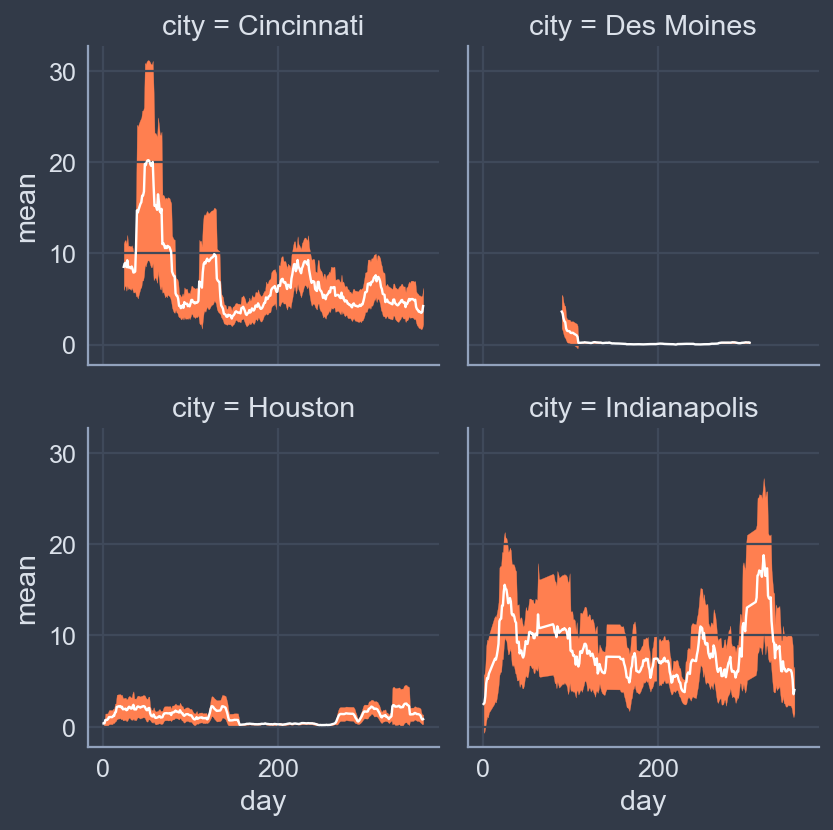

In [59]:
g = sns.FacetGrid(eastern_SO2, col = 'city', col_wrap = 2)
g.map(plt.fill_between, 'day', 'lower', 'upper', color = 'coral')
g.map(plt.plot, 'day', 'mean', color = 'white')
plt.show()

### №22 Cleaning up bands for overlaps

* Filter the `SO2_compare` to the `for` loops currently selected `city`
* Color both the intervals and mean lines with the `color` accompanying each city
* Lower the interval and mean line opacities to 0.4 and 0.25, respectively
* Pass the `city` name to `plt.plot()` so the legend is labeled correctly

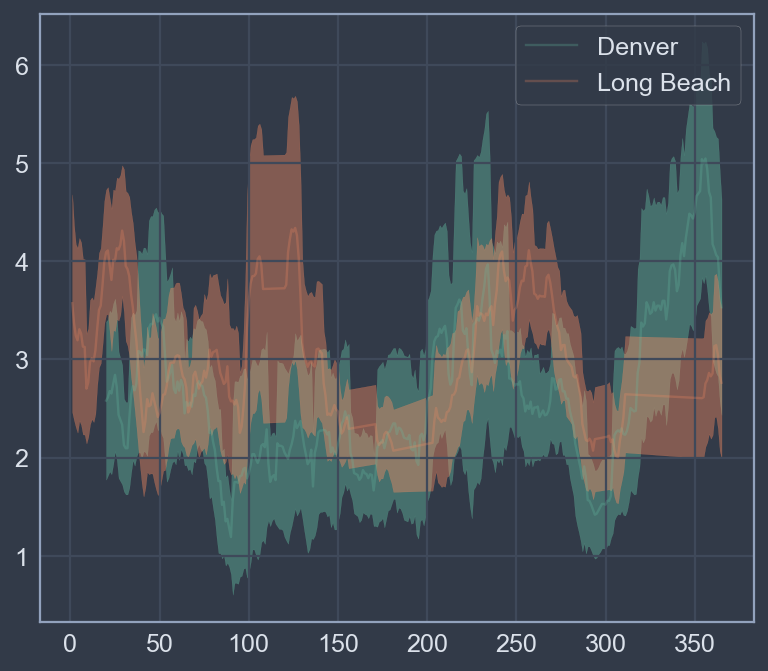

In [60]:
SO2_compare = pd.read_csv('Improving_Your_Data_Visualizations_in_Python/SO2_compare.csv')

for city, color in [('Denver','#66c2a5'), ('Long Beach', '#fc8d62')]:
    city_data = SO2_compare[SO2_compare.city  ==  city]
    plt.fill_between(x='day', y1='lower', y2='upper', data=city_data,
                     color=color, alpha=0.4)
    plt.plot('day', 'mean', data=city_data, label=city, color=color, alpha=0.25)
    
plt.legend()
plt.show()

## 9. Beyond 95%

### Why show more than one interval

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/Why_show_more_than_one_interval.png' alt='Why show more than one interval' width=500 align='left'>

```python
# Interval size setup
sizes = ['99%', '95%', '90%']
Z_scores = [2.58, 1.96, 1.67]
colors = ['#fee0b6','#f1a340', '#b35806']

for size, z, color in zip(sizes, Z_scores, colors):
    
    plt.hlines(y = data.y,
    # Calculate lower and upper boundaries
    xmin = data['est'] - z*data['std_err'],
    xmax = data['est'] + z*data['std_err'],
    # Color by interval size
    color = color,
    # Make line thicker for visibility
    linewidth = 7,
    # Label line so legend text is clear
    label = size)
    
plt.plot('est', 'y', 'ko', data = data, label = 'Point Estimate')
plt.legend()
```

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/Plot4.png' alt='plot' width=400 align='left'>

### Coloring your intervals

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/Coloring_your_intervals.png' alt='Coloring your intervals' width=400 align='left'>

```python
widths = ['99%', '90%']
z_scores = [ 2.58, 1.67]
colors = ['#99d8c9', '#41ae76']

for percent, Z, color in zip(widths, z_scores, colors):
    # Set color to distinquish bands
    plt.fill_between(x=data.day,
                     y1=data['mean'] - Z*data['std_err'],
                     y2=data['mean'] + Z*data['std_err']
                     color=color,
                     # Lower opacity so grid can show through
                     alpha=0.5,
                     # Give each band id for the legend
                     label=percent)
```

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/Plot5.png' alt='plt' width=400 align='left'>

```python
sizes = ['99% Confidence Interval', '95%', '90%']
# Set up different line widths for intervals
widths = [ 5, 10, 15]
Z_scores = [2.58, 1.96, 1.67]

for size, z, width in zip(sizes, Z_scores, widths):
    plt.hlines(y = data.y, label = size,
               xmin = data['est'] - z*data['std_err'],
               xmax = data['est'] + z*data['std_err'],
               color = 'grey'
               # Adjust line thickness by interval
               linewidth = width)
    
plt.plot('est','y','wo', data=data, label='Point Estimate')
plt.legend()
```

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/Plot6.png' alt='plt' width=400 align='left'>

### №23 90, 95, and 99% intervals

* Fill in the appropriate interval width percents (from 90,95, and 99%) according to the values list in `alpha`
* In the `for` loop, color the interval by its assigned `color`
* Pass the loop's `width` percentage value to `plt.hlines()` to label the legend

```python
alphas = [0.01, 0.05, 0.1] 
widths = [ '99% CI', '95%', '90%']
colors = ['#fee08b','#fc8d59','#d53e4f']

for alpha, color, width in zip(alphas, colors, widths):
    conf_ints = pollution_model.conf_int(alpha)
    
    plt.hlines(y = conf_ints.index, xmin = conf_ints[0], xmax = conf_ints[1],
               colors = color, label = width, linewidth = 10) 

plt.plot(pollution_model.params, pollution_model.params.index, 'wo',
         label = 'Point Estimate')
plt.legend()
plt.show() 
```

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/Plot3.png' alt='plot' width=400 align='left'>

### №24 90 and 95% bands

* Set the opacity of the intervals to 40%
* Calculate the lower and upper confidence bounds

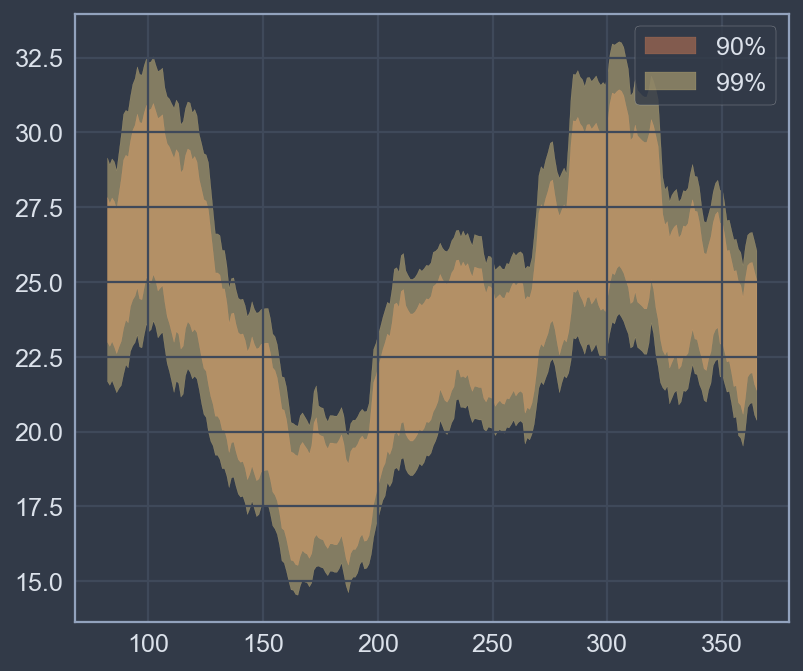

In [61]:
cinci_13_no2 = pd.read_csv('Improving_Your_Data_Visualizations_in_Python/cinci_13_no2.csv')
int_widths = ['90%', '99%']
z_scores = [1.67, 2.58]
colors = ['#fc8d59', '#fee08b']

for percent, Z, color in zip(int_widths, z_scores, colors):
    plt.fill_between(x = cinci_13_no2.day, alpha = 0.4, color = color,
                     y1 = cinci_13_no2['mean'] - Z*cinci_13_no2['std_err'],
                     y2 = cinci_13_no2['mean'] + Z*cinci_13_no2['std_err'],
                     label = percent)
    
plt.legend()
plt.show()

### №25 Using band thickness instead of coloring

* Use a thickness of `15` for 90%, `10` for 95%, and `5` for 99% interval lines
* Pass the interval thickness value to `plt.hlines()`
* Set the interval color to `'gray'` to lighten contrast

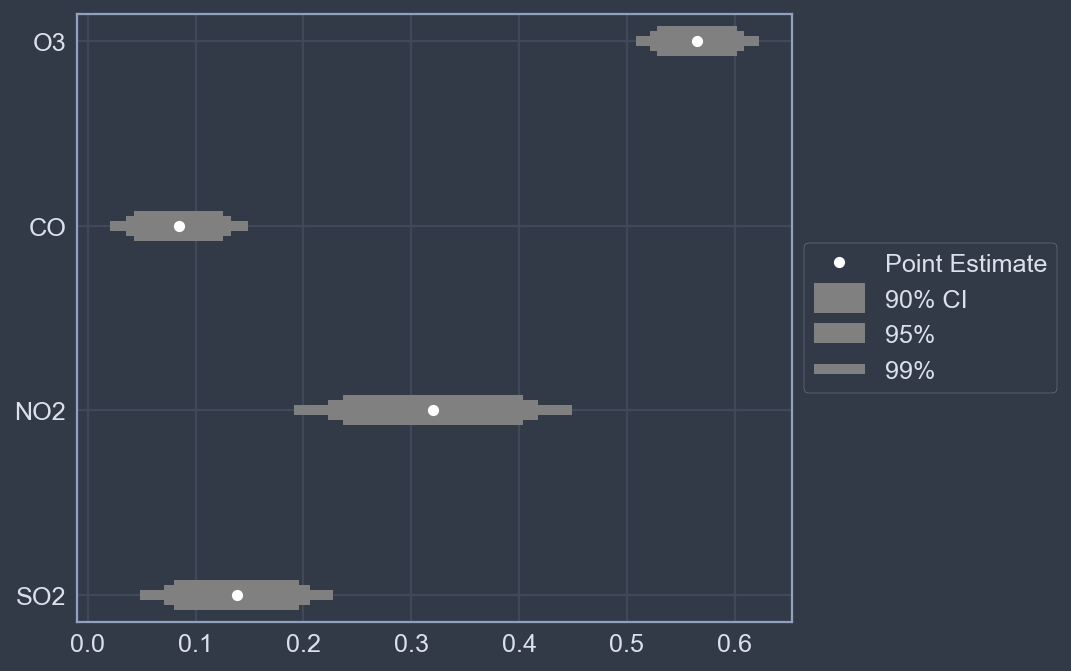

In [62]:
rocket_model = pd.read_csv('Improving_Your_Data_Visualizations_in_Python/rocket_model.csv')

sizes = [15, 10, 5]
int_widths = ['90% CI', '95%', '99%']
z_scores = [1.67, 1.96, 2.58]

for percent, Z, size in zip(int_widths, z_scores, sizes):
    plt.hlines(y = rocket_model.pollutant, 
               xmin = rocket_model['est'] - Z*rocket_model['std_err'],
               xmax = rocket_model['est'] + Z*rocket_model['std_err'],
               label = percent,
               linewidth = size, 
               color = 'gray') 
    
plt.plot('est', 'pollutant', 'wo', data = rocket_model, label = 'Point Estimate')
plt.legend(loc = 'center left', bbox_to_anchor = (1, 0.5))
plt.show()

## 10. Visualizing the bootstrap

### Confidence interval issues

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/Confidence_interval_issues.png' alt='Confidence interval issues' width=400 align='left'>

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/Confidence_interval_issues2.png' alt='Confidence interval issues' width=400 align='left'>

### The Bootstrap

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/The_Bootstrap.png' alt='The Bootstrap' width=300 align='left'>

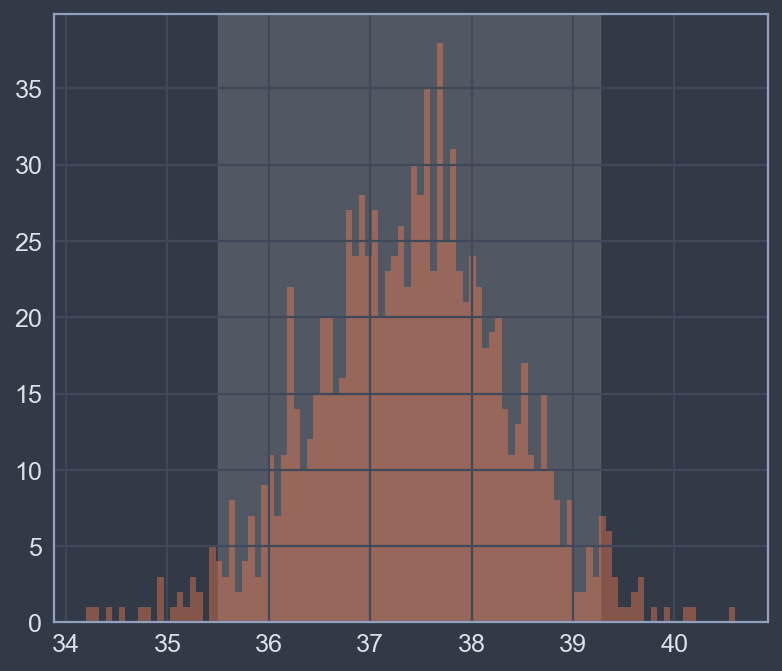

In [63]:
denver_may = pollution.query("city == 'Denver' & month == 8")

# Perform bootstrapped mean on a vector
def bootstrap(data, n_boots):
    return [np.mean(np.random.choice(data, len(data))) for _ in range(n_boots)]

# Generate 1,000 bootstrap samples
boot_means = bootstrap(denver_may.NO2, 1000)
# Get lower and upper 95% interval bounds
lower, upper = np.percentile(boot_means, [2.5, 97.5])

# Shaded background of interval
plt.axvspan(lower, upper, color='lightgray', alpha=0.2)
# Plot histogram of samples
sns.distplot(boot_means, bins = 100, kde=False, color='coral')
plt.show()

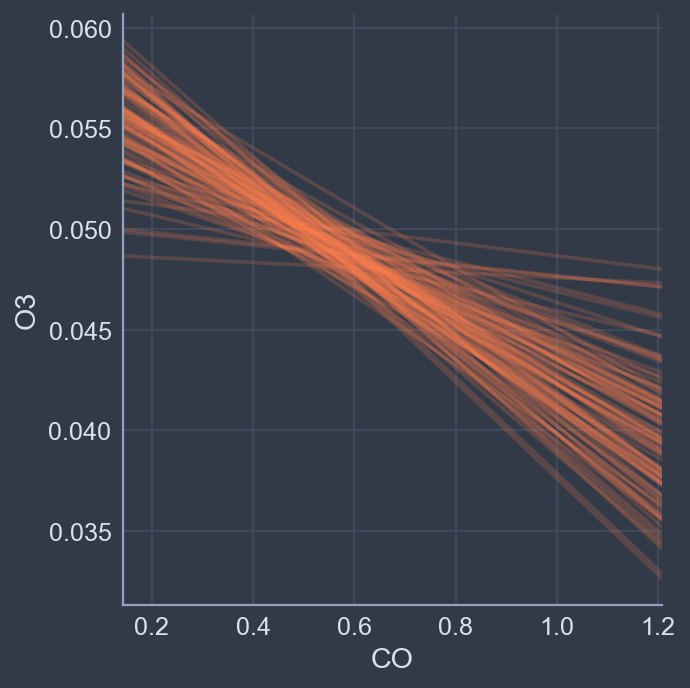

In [64]:
# Make dataframe of bootstraped data
denver_may_boot = pd.concat([
    denver_may.sample(n=len(denver_may), replace=True).assign(sample=i)
    for i in range(100)])

# Plot regressions for each sample
sns.lmplot('CO', 'O3', data=denver_may_boot, scatter=False,
           # Tell seaborn to draw a regression line for each resample's data
           hue='sample',
           # Make lines orange and transparent
           line_kws = {'color': 'coral', 'alpha': 0.2},
           # No confidence intervals
           ci=None, legend = False)
plt.show()

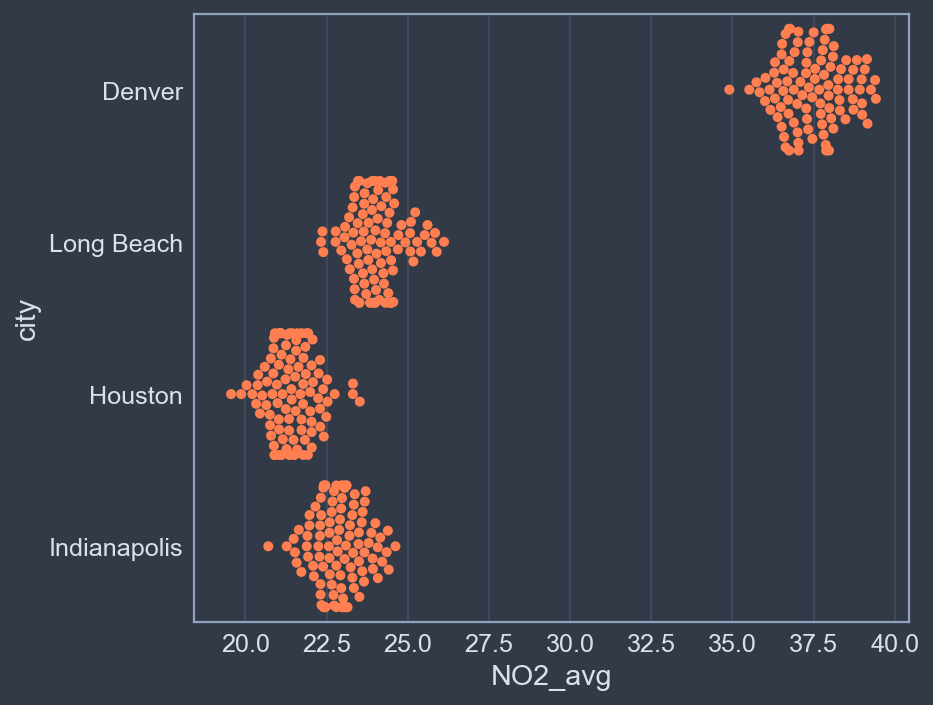

In [65]:
aug_pol = pollution.query('month == 8')

# Holder DataFrame for bootstrap samples
city_boots = pd.DataFrame()

for city in ['Denver', 'Long Beach', 'Houston', 'Indianapolis']:
    # Filter to city's NO2
    city_NO2 = aug_pol[aug_pol.city == city].NO2
    # Perform 100 bootstrap samples of city's NO2 & put in DataFrame
    cur_boot = pd.DataFrame({'NO2_avg': bootstrap(city_NO2, 100), 'city': city })
    # Append to other city's bootstraps
    city_boots = pd.concat([city_boots, cur_boot])
    
# Use beeswarm plot to visualize bootstrap samples
sns.swarmplot(y='city', x='NO2_avg', data=city_boots, color='coral')
plt.show()

### №26 The bootstrap histogram

* Provide the `percentile()` function with the upper and lower percentiles needed to get a 95% interval
* Shade the background of the plot in the 95% interval
* Draw histogram of bootstrap means with 100 bins

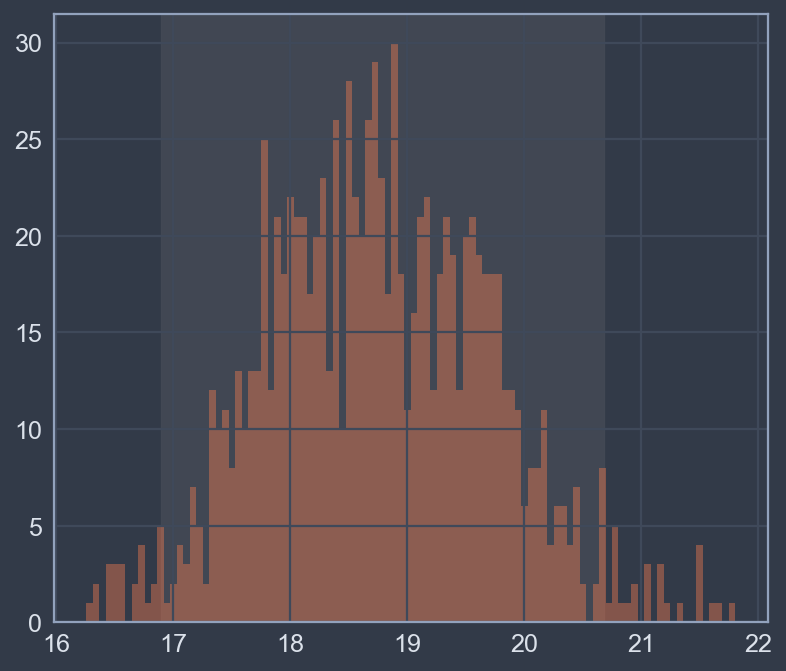

In [66]:
cinci_may_NO2 = pollution.query("city  ==  'Cincinnati' & month  ==  5").NO2

boot_means = bootstrap(cinci_may_NO2, 1000)
lower, upper = np.percentile(boot_means, [2.5, 97.5])

plt.axvspan(lower, upper, color = 'gray', alpha = 0.2)
sns.distplot(boot_means, bins = 100, kde = False, color='coral')
plt.show()

### №27 Bootstrapped regressions

* Let `sns.lmplot()` know that it needs to draw a separate regression line for each bootstrap `sample`
* Color every regression line `'steelblue'` and make them 20% opaque
* Disable the default Seaborn confidence bands around the regression lines

In [67]:
no2_so2 = pd.concat([pollution[['NO2', 'SO2']][6672:6703],
                     pollution[['NO2', 'SO2']][7017:7048]])
no2_so2_boot = pd.concat([no2_so2.sample(62) for i in range(70)])

samples = []
for i in range(70):
    samples.extend([i for j in range(62)])
    
no2_so2_boot['sample'] = samples

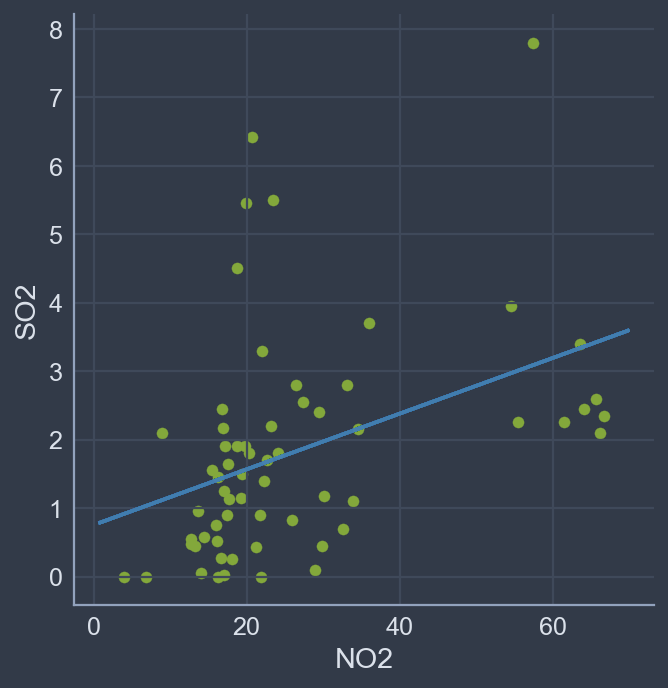

In [68]:
sns.lmplot('NO2', 'SO2', data = no2_so2_boot,
           hue = 'sample', 
           line_kws = {'color': 'steelblue', 'alpha': 0.2},
           ci = None, legend = False, scatter = False)

plt.scatter('NO2', 'SO2', data = no2_so2)
plt.show()

### №28 Lots of bootstraps with beeswarms

* Run bootstrap resampling on each `city_NO2` vector
* Add city name as a column in the bootstrap DataFrame, `cur_boot`
* Color all swarm plot points `'coral'` to avoid the color-size problem

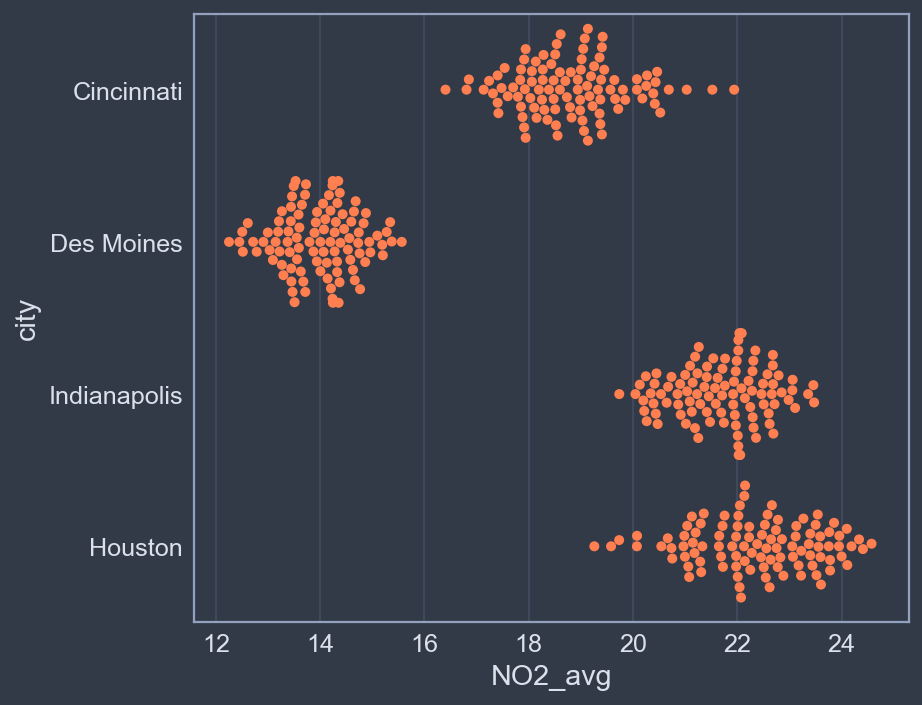

In [69]:
pollution_may = pollution.query('month == 5')
city_boots = pd.DataFrame()

for city in ['Cincinnati', 'Des Moines', 'Indianapolis', 'Houston']:
    city_NO2 = pollution_may[pollution_may.city  ==  city].NO2
    cur_boot = pd.DataFrame({'NO2_avg': bootstrap(city_NO2, 100), 'city': city})
    city_boots = pd.concat([city_boots,cur_boot])

sns.swarmplot(y = "city", x = "NO2_avg", data = city_boots, color='coral')
plt.show()

## Chapter 4. Visualization in the data science workflow

## 11. First explorations

### First explorations of a dataset

* Take a broad view
* Show as much info as possible
* Don't fuss over appearances

### Using your head()

In [70]:
pollution.head()

city  year  month  day     CO   NO2     O3    SO2 interesting cities  \
0  Cincinnati  2012      1    1  0.245  20.0  0.030   4.20         Cincinnati   
1  Cincinnati  2012      1    2  0.185   9.0  0.025   6.35         Cincinnati   
2  Cincinnati  2012      1    3  0.335  31.0  0.025   4.25         Cincinnati   
3  Cincinnati  2012      1    4  0.305  25.0  0.016  17.15         Cincinnati   
4  Cincinnati  2012      1    5  0.345  21.0  0.016  11.05         Cincinnati   

   NO2 Tertial  CO quartile  
0            1            0  
1            0            0  
2            2            1  
3            1            1  
4            1            1

In [71]:
# Just show median
pollution.describe(percentiles=[0.5],
                   # Describe all columns
                   include='all')

city         year        month          day           CO  \
count      8888  8888.000000  8888.000000  8888.000000  8888.000000   
unique        8          NaN          NaN          NaN          NaN   
top     Houston          NaN          NaN          NaN          NaN   
freq       1433          NaN          NaN          NaN          NaN   
mean        NaN  2013.621737     6.657516   187.187894     0.492867   
std         NaN     1.084081     3.328182   101.739060     0.403896   
min         NaN  2012.000000     1.000000     1.000000    -0.150000   
50%         NaN  2014.000000     7.000000   192.000000     0.350000   
max         NaN  2015.000000    12.000000   366.000000     5.170000   

                NO2           O3          SO2 interesting cities  NO2 Tertial  \
count   8888.000000  8888.000000  8888.000000               8888  8888.000000   
unique          NaN          NaN          NaN                  3          NaN   
top             NaN          NaN          NaN              other          NaN   
freq            NaN          NaN          NaN               6710          NaN   
mean      23.689168     0.035904     3.824927                NaN     0.998875   
std       16.760212     0.013221     6.582867                NaN     0.816174   
min        0.000000     0.000000    -1.300000                NaN     0.000000   
50%       22.000000     0.036000     1.650000                NaN     1.000000   
max      136.400000     0.108000   145.000000                NaN     2.000000   

        CO quartile  
count   8888.000000  
unique          NaN  
top             NaN  
freq            NaN  
mean       1.461971  
std        1.140868  
min        0.000000  
50%        1.000000  
max        3.000000

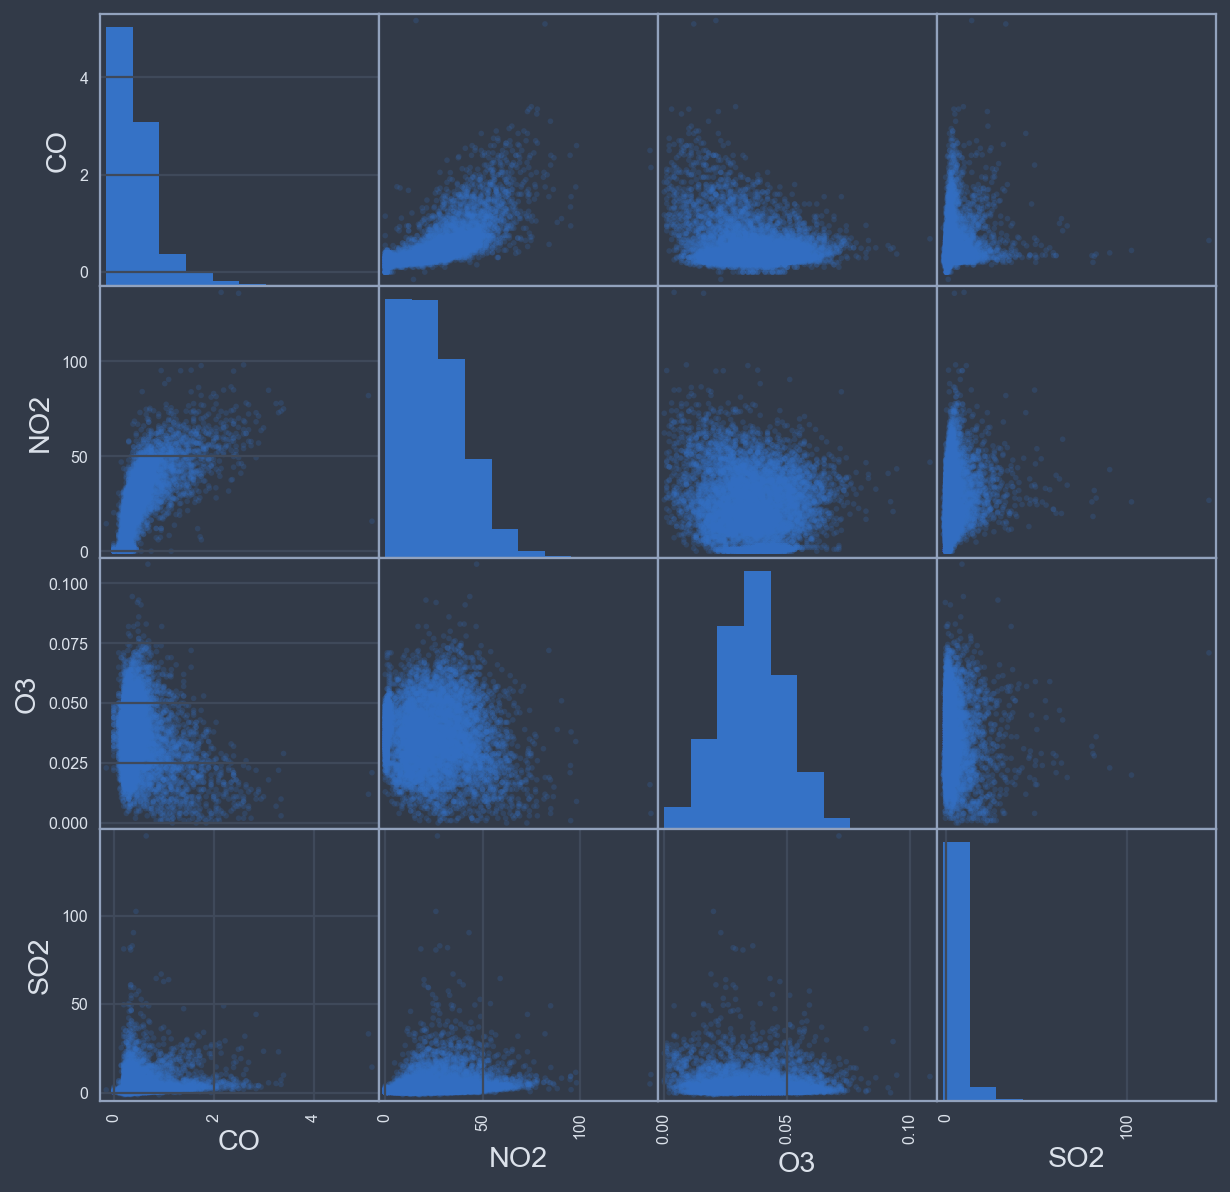

In [72]:
pd.plotting.scatter_matrix(pollution[['CO', 'NO2', 'O3', 'SO2']], alpha = 0.2, figsize=(10, 10))
plt.show()

In [73]:
markets = pd.read_csv('Improving_Your_Data_Visualizations_in_Python/markets.csv')
markets.head()

name          city      county    state  \
0                    Island Market     Key Largo      Monroe  Florida   
1    COFFO Harvest Farmers' Market  Florida City  Miami-Dade  Florida   
2    COFFO Harvest Farmers' Market     Homestead  Miami-Dade  Florida   
3     Verde Gardens Farmers Market     Homestead  Miami-Dade  Florida   
4  Verde Community Farm and Market     Homestead  Miami-Dade  Florida   

         lat        lon  months_open  Bakedgoods  Beans  Cheese  ...  \
0 -80.427218  25.109214            6           1      1       1  ...   
1 -80.482299  25.449850           12           0      0       0  ...   
2 -80.483400  25.463500           12           0      0       0  ...   
3 -80.395607  25.506727           12           0      0       0  ...   
4 -80.395607  25.506727            9           0      0       0  ...   

   Prepared  Seafood  Soap  Tofu  Trees  Vegetables  WildHarvested  Wine  \
0         1        1     1     0      0           1              0     0   
1         1        0     0     0      1           1              0     0   
2         1        0     0     0      1           1              0     0   
3         1        0     0     0      0           1              0     0   
4         0        0     0     0      0           1              0     0   

   num_items_sold   state_pop  
0              18  19893297.0  
1               7  19893297.0  
2               7  19893297.0  
3               5  19893297.0  
4               5  19893297.0  

[5 rows x 38 columns]

### №29 Looking at the farmers market data

* Print the first three rows of the data and transpose by chaining the `transpose()` method to the DataFrame`
* Print the basic description of every column along with its median and transpose

In [74]:
first_rows = markets.head(3).transpose()
print(first_rows)

col_descriptions = markets.describe(include = 'all', percentiles = [0.5]).transpose()
print(col_descriptions)

                            0                              1  \
name            Island Market  COFFO Harvest Farmers' Market   
city                Key Largo                   Florida City   
county                 Monroe                     Miami-Dade   
state                 Florida                        Florida   
lat                  -80.4272                       -80.4823   
lon                   25.1092                        25.4499   
months_open                 6                             12   
Bakedgoods                  1                              0   
Beans                       1                              0   
Cheese                      1                              0   
Coffee                      1                              0   
Crafts                      1                              0   
Eggs                        1                              0   
Flowers                     1                              1   
Fruits                      1           

### №30 Scatter matrix of numeric columns

* Subset the columns of the `markets` DataFrame to `numeric_columns` so the scatter matrix only shows numeric non-binary columns
* Increase figure size to `15` by `10` to avoid crowding
* Reduce point opacity to 50% to show regions of overlap

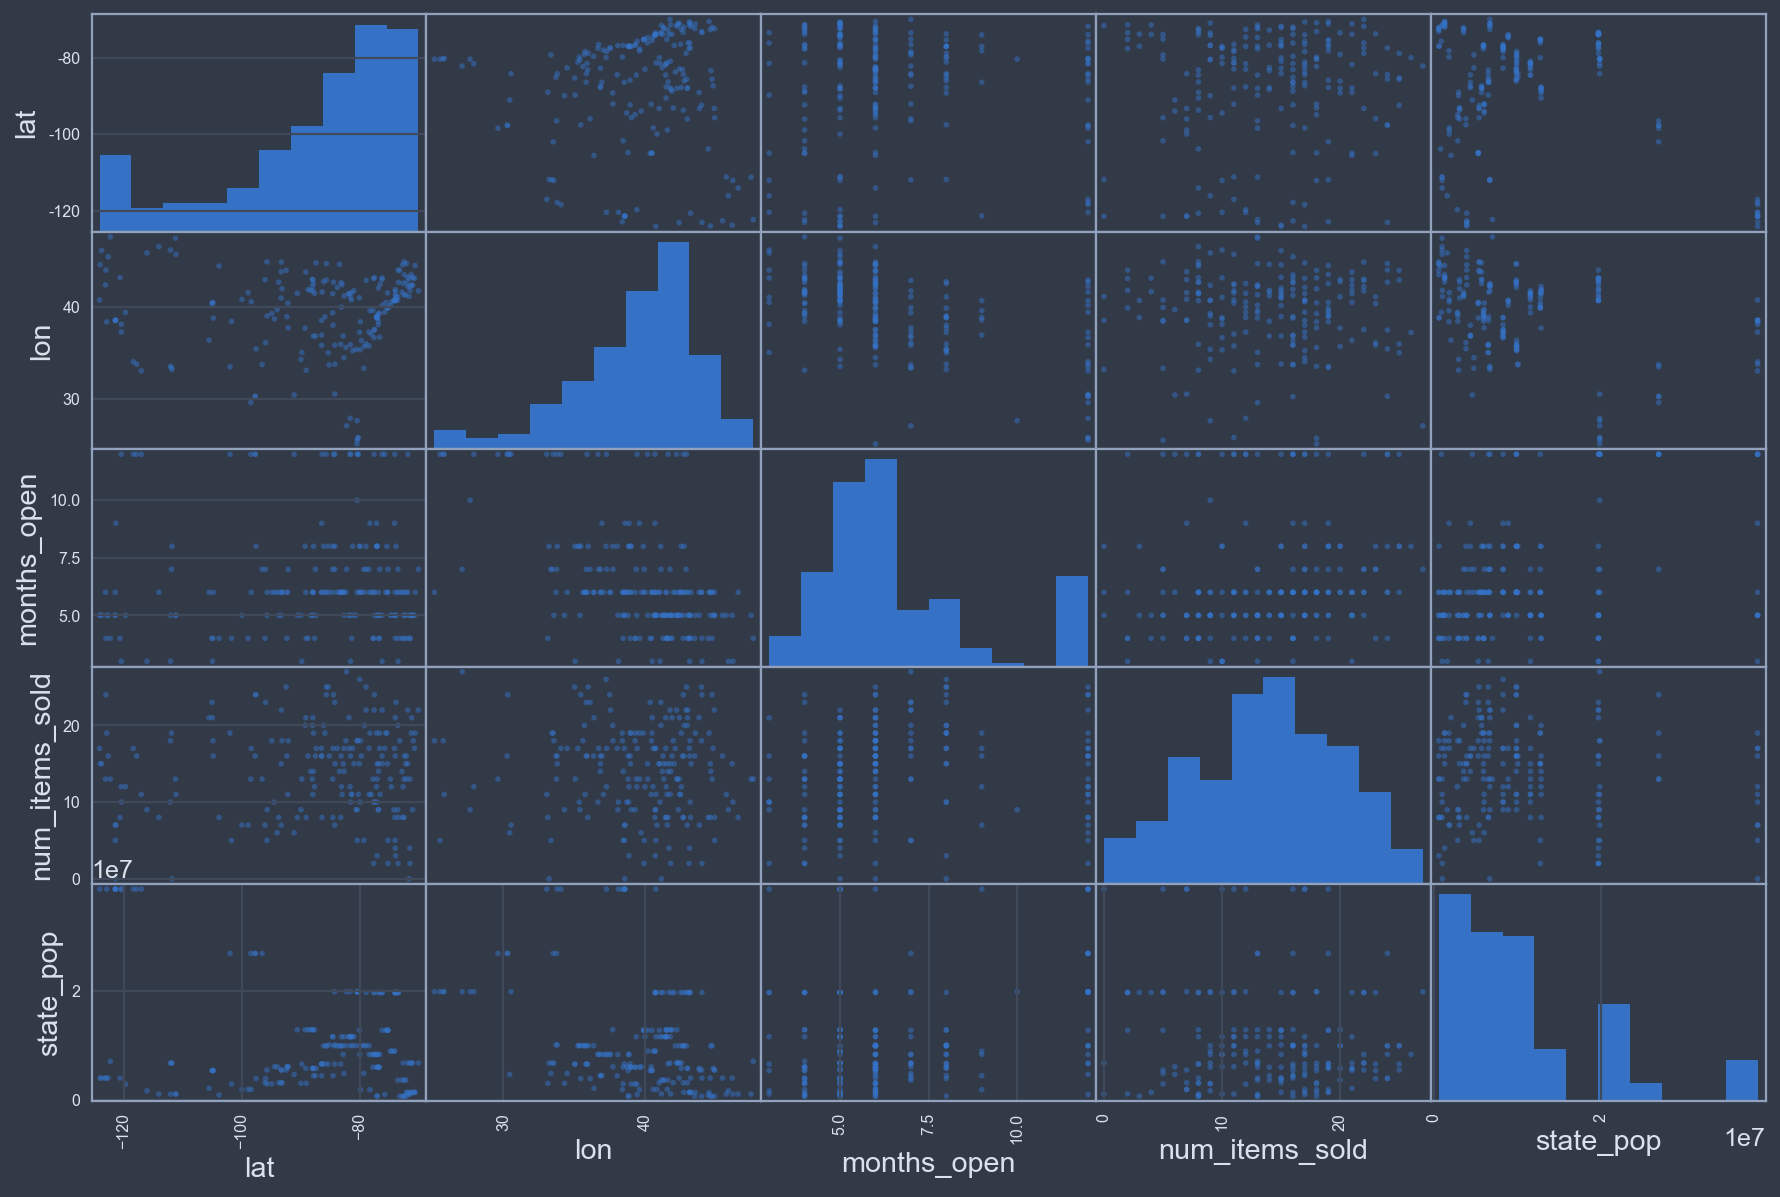

In [75]:
markets_200 = markets.sample(200)
numeric_columns = ['lat', 'lon', 'months_open', 'num_items_sold', 'state_pop']

pd.plotting.scatter_matrix(markets_200[numeric_columns], figsize= (15, 10), alpha =.5)
plt.show()

### №31 Digging in with basic transforms

* Use `numpy` (imported as `np`) to create a new column: `log_pop` by taking the log of the state population
* Pass this newly created logged column to the scatter plot function's x-mapping
* Set the scatter plot's opacity to 25% to show overlap

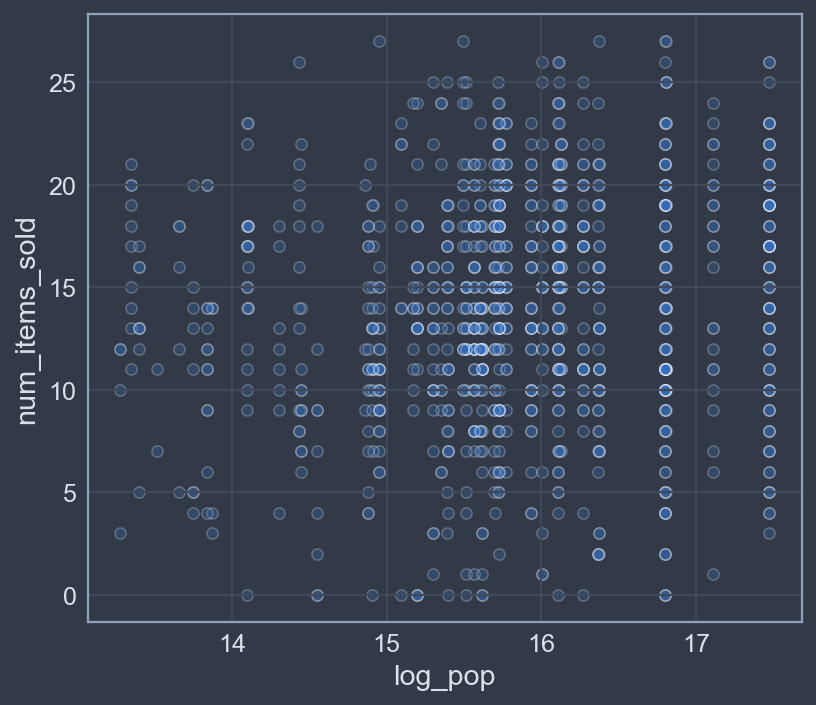

In [76]:
markets_1000 = markets.sample(1000)
markets_1000['log_pop'] = np.log(markets_1000['state_pop'])

sns.scatterplot(x='log_pop', y='num_items_sold', alpha=.25, data=markets_1000)
plt.show()

## 12. Exploring the pattern

### Digging in deeper

* Investigating correlations
* Are correlations driven by confounding?
* Anything surprising?

### Target audiences

* Shared with peers
* Be smart about design decisions
* Remember they aren't as familiar with data

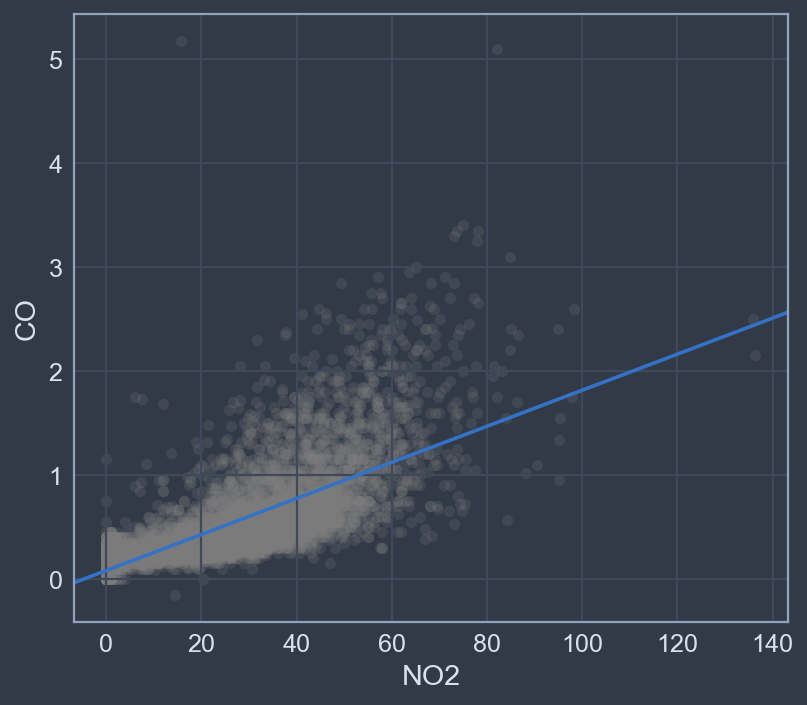

In [77]:
sns.regplot('NO2','CO', ci=False, data=pollution,
            # Lower opacity of points
            scatter_kws={'alpha':0.2, 'color':'grey'})
plt.show()

### Proling patterns

* Found interesting pattern in data
* How to quickly explore and explain the pattern?
* Use text

### Using text scatters to id outliers

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/Using_text_scatters_to_id_outliers.png' alt='Using text scatters to id outliers' width=800 align='left'>

```python
g = sns.scatterplot('SO2', 'CO', data=long_beach_avgs)
# Iterate over the rows of our data
for _, row in long_beach_avgs.iterrows():
    # Unpack columns from row
    month, SO2, CO = row
    # Draw annotation in correct place
    g.annotate(month, (SO2,CO))
    
plt.title('Long Beach avg SO2 by CO')
```

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/Plot7.png' alt='plot' width=400 align='left'>

### №32 Is longitude related to months open?

* Set the scatter plot's points opacity to 10% and color them `'gray'`
* Disable the default confidence interval band

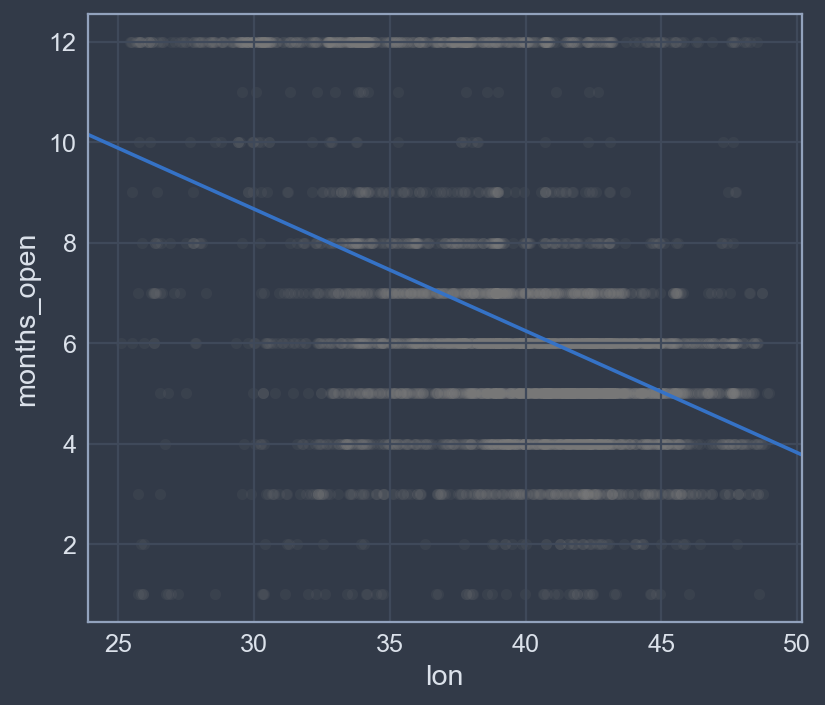

In [78]:
sns.regplot(x = 'lon', y = 'months_open', 
            scatter_kws = {'alpha': .1, 'color':'gray'}, 
            ci = False, data = markets)
plt.show()

### №33 What state is the most market-friendly?

* Iterate over the rows of the `markets_and_pop` DataFrame
* Place annotations next to their scatter plot points
* Reduce annotation text size to `10` points

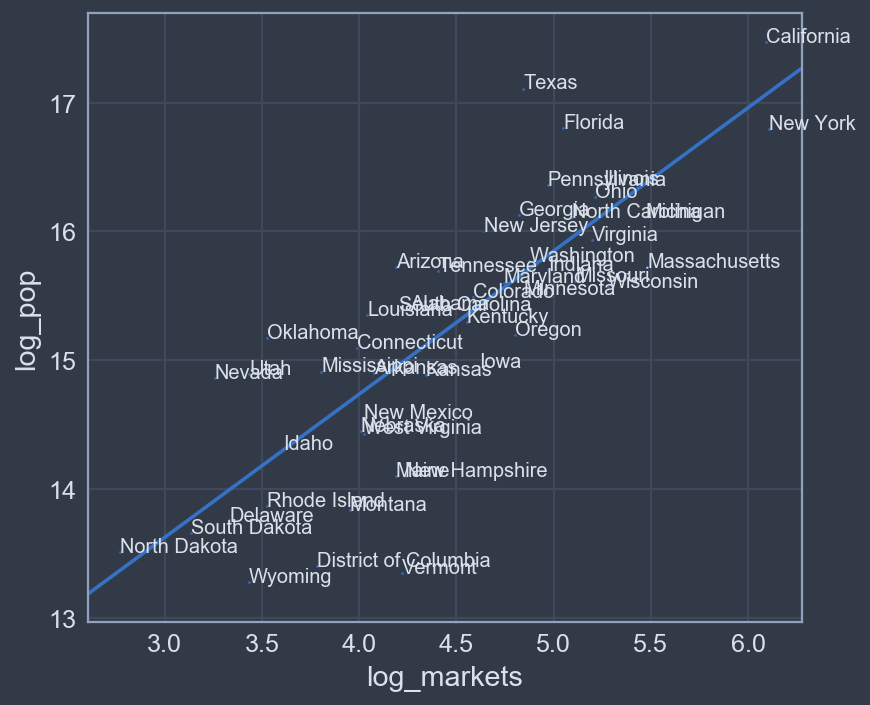

In [79]:
markets_and_pop = (markets.groupby('state', as_index = False)
                   .agg({'name': lambda d: np.log(len(d)),'state_pop': lambda d: np.log(d.iloc[0]) })
                   .rename(columns = {'name': 'log_markets', 'state_pop': 'log_pop' }))

g = sns.regplot('log_markets', 'log_pop', ci = False, 
                scatter_kws = {'s':2}, data = markets_and_pop)

for _, row in markets_and_pop.iterrows():
    state, log_markets, log_pop = row
    g.annotate(state, (log_markets,log_pop), size = 10)

plt.show()

### №34 Popularity of goods sold by state

* Filter `goods_by_state` to the desired goods listed in `to_plot`
* Hide the scatter plot points by setting their size to nothing
* Make the text center aligned, so it sits directly on the good's x-axis location

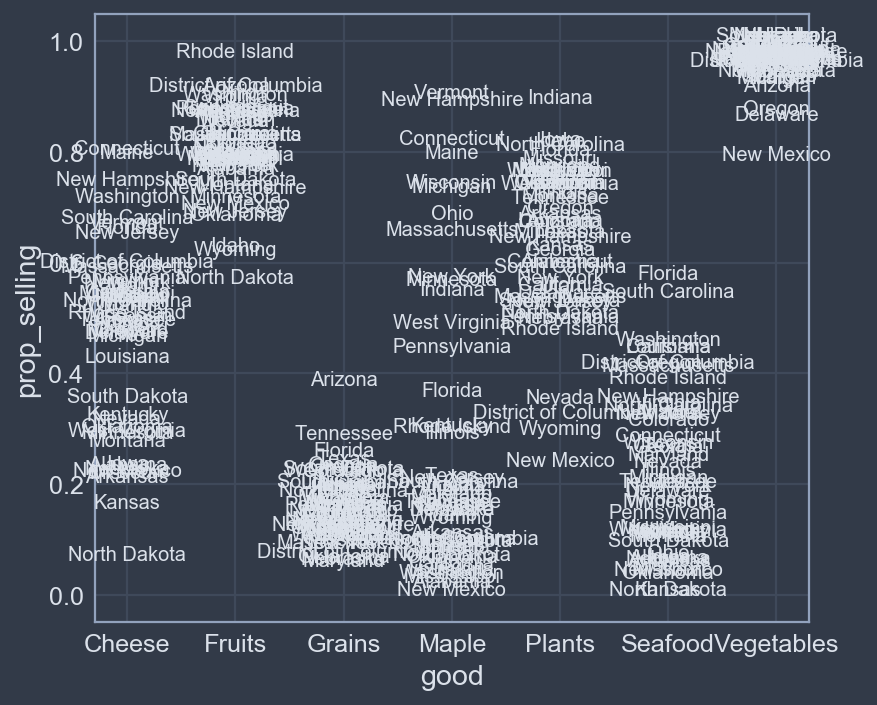

In [80]:
goods_by_state = pd.read_csv('Improving_Your_Data_Visualizations_in_Python/goods_by_state.csv')

to_plot = ['Cheese','Maple','Fruits','Grains','Seafood','Plants','Vegetables']
goods_by_state_small = goods_by_state.query('good in ' + str(to_plot))

g = sns.scatterplot('good','prop_selling', data = goods_by_state_small, s = 0)

for _, row in goods_by_state_small.iterrows():
    g.annotate(row['state'], (row['good'], row['prop_selling']), ha = 'center', size = 10)

plt.show()

## 13. Making your visualizations efficient

### Whatis efcient?

* Reduce the effort needed to see story
* Re-organize plots to keep focus
* Improve 'ink' to info ratio
* Don't compromise the message

### Combining plots

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/Combining_plots.png' alt='Combining plots' width=600 align='left'>

```python
# Create a subplot w/ one row & two columns.
f, (ax1, ax2) = plt.subplots(1, 2)
# Pass each axes to respective plot
sns.lineplot('month', 'NO2', 'year', ax=ax1, data=pol_by_month)
sns.barplot('year', 'count', ax=ax2, data=obs_by_year)
```

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/Double_plot.png' alt='Double plot' width=600 align='left'>

### Clear unnecessary legends

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/Double_plot2.png' alt='Double plot' width=600 align='left'>

```python
sns.lineplot('month', 'NO2', 'year', ax=ax1,
             data=pol_by_month, palette='RdBu')
sns.barplot('year', 'count', 'year', ax=ax2, data=obs_by_year,
            palette='RdBu', dodge=False)
# Remove legends for both plots
ax1.legend_.remove()
ax2.legend_.remove()
```

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/Double_plot3.png' alt='Double plot' width=600 align='left'>

### №35 Stacking to find trends

* Set up `plt.subplots()` to have two vertically stacked plots
* Assign the first (top) plot to the `lat`, `lon` scatter plot
* Assign the second (bottom) plot to the `lat` to `months_open` regression plot

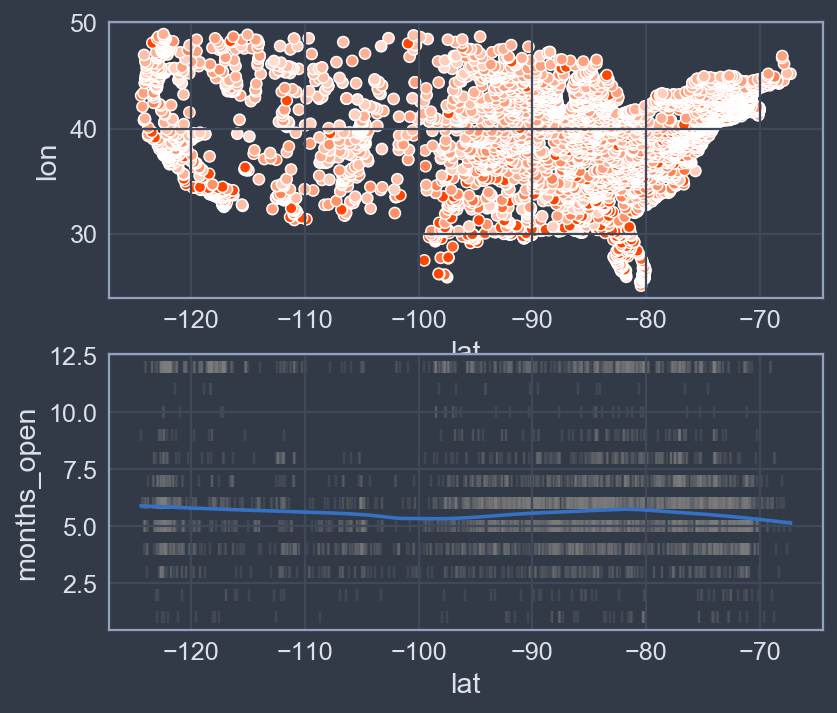

In [81]:
_, (ax1, ax2) = plt.subplots(2, 1)

sns.scatterplot('lat', 'lon', 'months_open', 
                palette = sns.light_palette("orangered",n_colors = 12), 
                legend = False, data = markets,
                ax = ax1);

sns.regplot('lat', 'months_open',
            scatter_kws = {'alpha': 0.2, 'color': 'gray', 'marker': '|'},
            lowess = True,
            marker = '|', data = markets, 
            ax = ax2)

plt.show()

### №36 Using a plot as a legend

* Set up two plots side-by-side using `plt.subplots()`
* Map the column `is_selected` to the color of both the bar and scatter plot
* Disable `dodge` on the bar plot, so the bars are full height
* Remove the legends in both plots

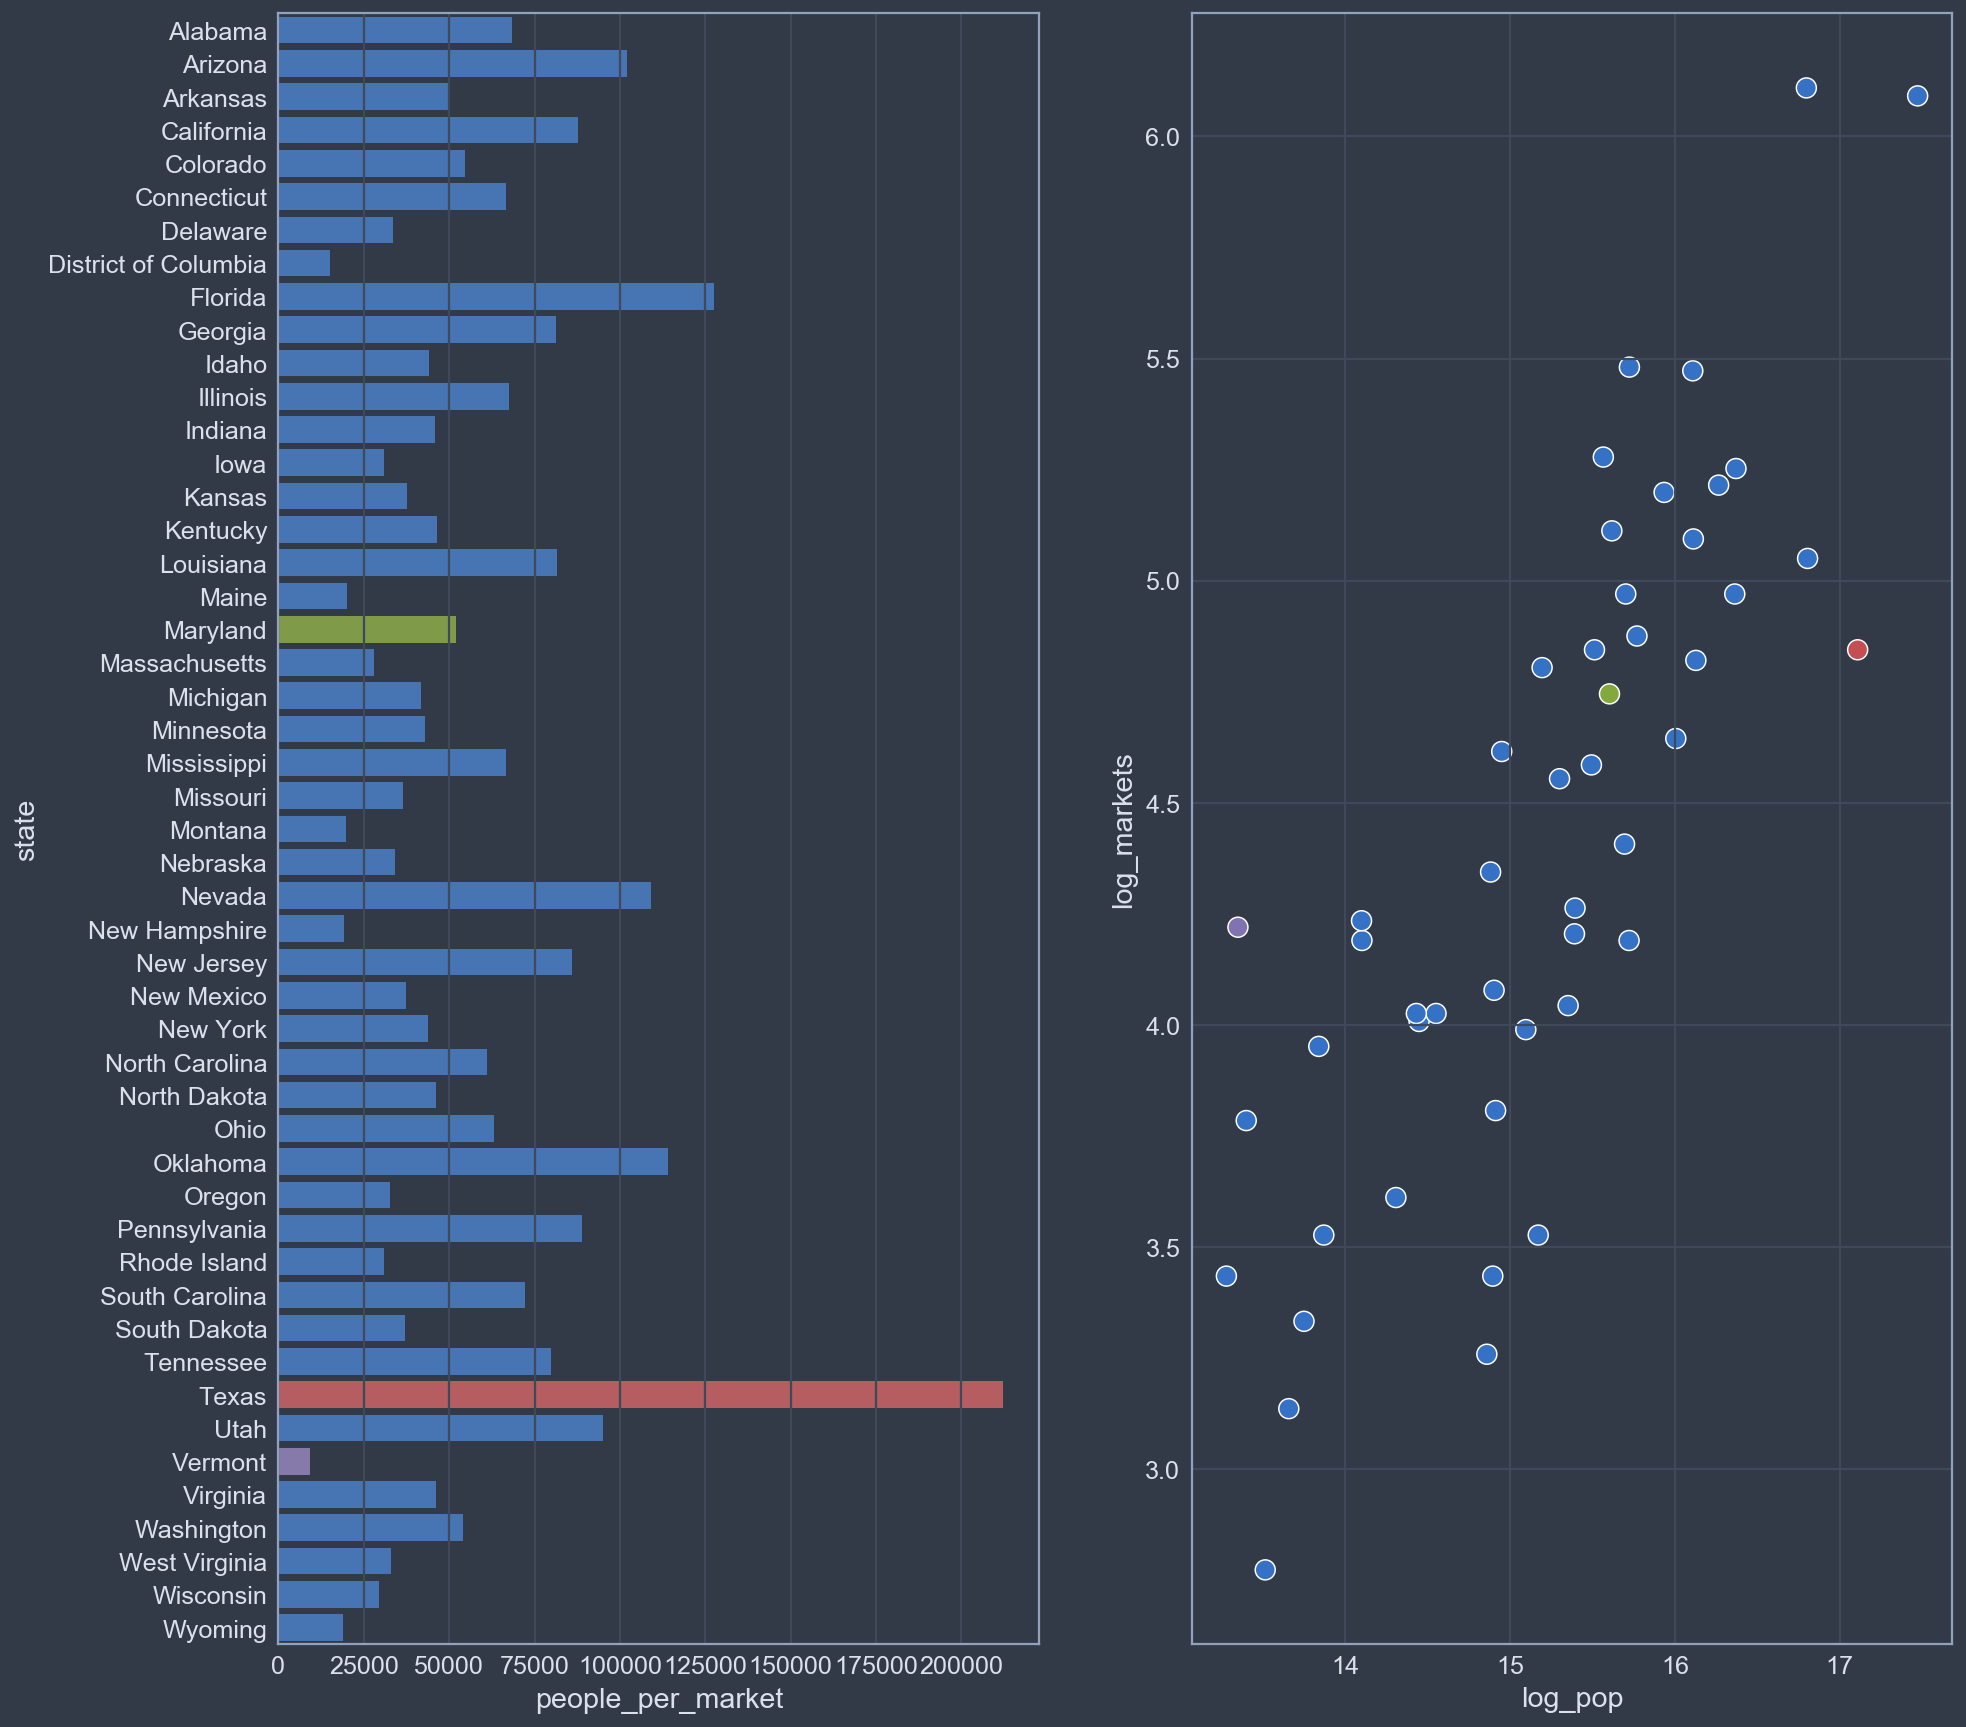

In [82]:
markets_by_state = pd.read_csv('Improving_Your_Data_Visualizations_in_Python/' \
                               'markets_by_state.csv')

f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 15))

sns.barplot('people_per_market', 'state', hue = 'is_selected',
            dodge = 0, data = markets_by_state, ax = ax1)

sns.scatterplot('log_pop', 'log_markets', hue = 'is_selected', 
                data = markets_by_state, ax = ax2, s = 100)

ax1.legend_.remove()
ax2.legend_.remove() 

## 14. Tweaking your plots

### Looking atthe small things

* Put yourselfinto the viewer's shoes

### Is the aesthetic appropriate?

* Is the aesthetic appropriate for the context?

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/Is_the_aesthetic_appropriate.png' alt='Is the aesthetic appropriate' width=600 align='left'>

### Font-sizes

* Is everything legible?

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/Font-sizes.png' alt='Font-sizes' width=600 align='left'>

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/Plots.png' alt='Plots styles' width=600 align='left'>

### Removing spines from plots

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/Removing_spines_from_plots.png' alt='Removing spines from plots' width=400 align='left'>

### Setting font-size

<img src='Improving_Your_Data_Visualizations_in_Python/Pictures/Setting_font-size.png' alt='Setting font-size' width=600 align='left'>

### №37 Cleaning up the background

* Set the background of the plot to be white with gridlines
* Encode the x and y-axes of the scatter and line plots with the `'good'` being sold and `'prop selling'`, respectively
* Remove all the borders from the plot

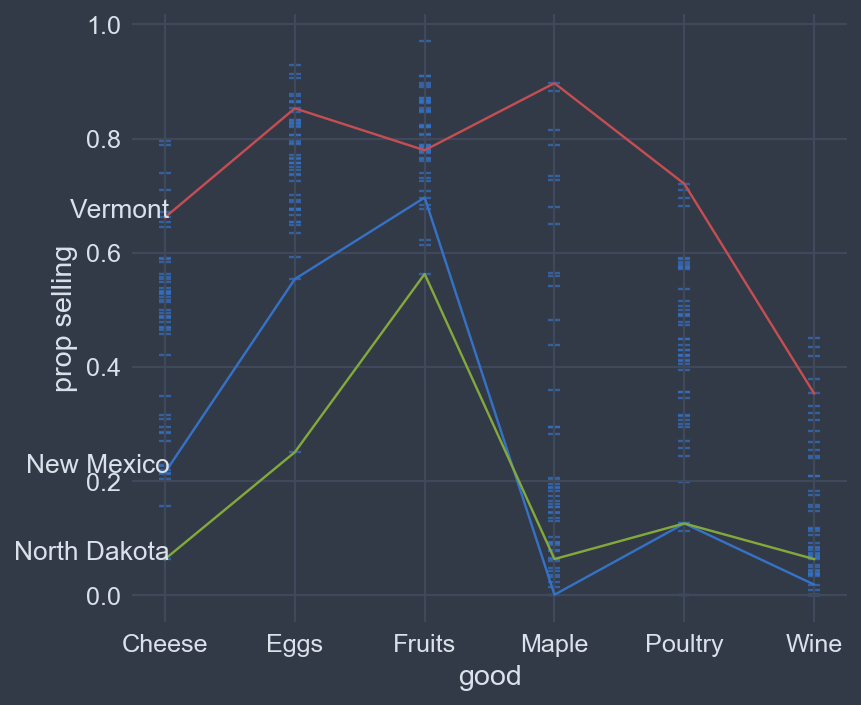

In [83]:
#sns.set_style('whitegrid')
goods_by_state_2 = pd.read_csv('Improving_Your_Data_Visualizations_in_Python/' \
                               'goods_by_state_2.csv')

plt.scatter('good','prop selling', marker = '_', alpha = 0.7, data = goods_by_state_2)

# Draw lines across goods for highlighted states
highlighted = goods_by_state_2.query("state in ['New Mexico','North Dakota','Vermont']")
sns.lineplot('good','prop selling', 'state', data = highlighted, legend = False)

# Draw state name at end of lines
last_rows = highlighted.groupby('state', as_index = False).agg('first')
for _,row in last_rows.iterrows():
    plt.annotate(row['state'], (row['good'], row['prop selling']),
                 ha = 'right', xytext = (5,0), textcoords = 'offset pixels')

# Remove all borders
sns.despine(bottom = True, left = True)
plt.show()

### №38 Remixing a plot

* Decrease the font size to 85% of the default to un-crowd state names
* Make new color palette that goes from `'white'` to `'steelblue'`
* Replace the default palette with the newly created one
* Remove the continuous color bar legend drawn next to heatmap

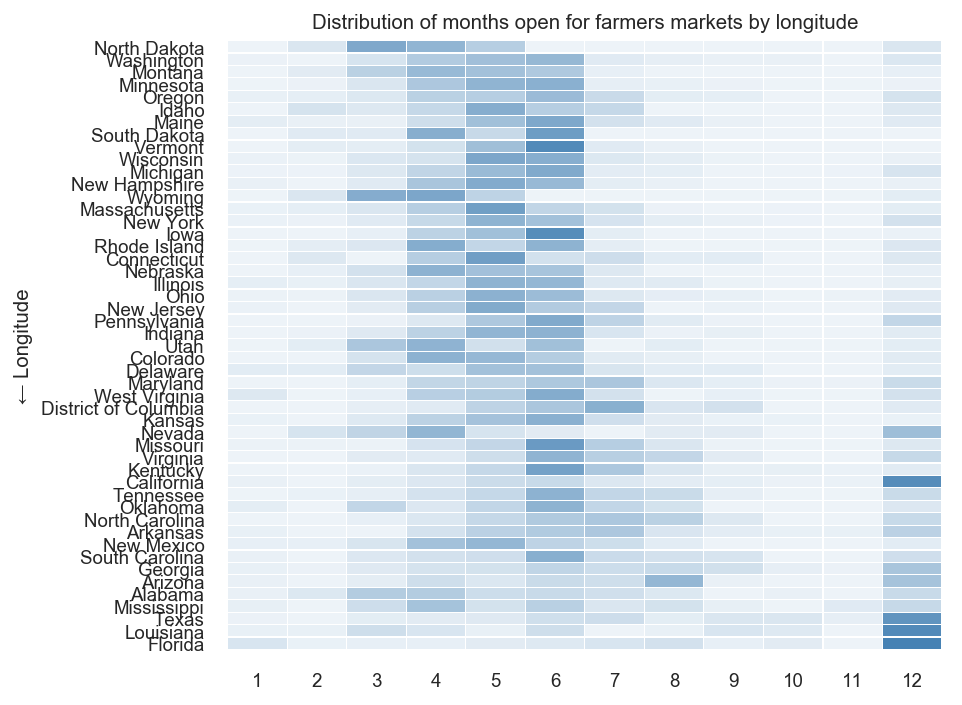

In [84]:
markets_by_month = pd.read_csv('Improving_Your_Data_Visualizations_in_Python/' \
                               'markets_by_month.csv', index_col='state')

state_by_lon = pd.Index(['North Dakota', 'Washington', 'Montana', 'Minnesota', 'Oregon',
                         'Idaho', 'Maine', 'South Dakota', 'Vermont', 'Wisconsin', 'Michigan',
                         'New Hampshire', 'Wyoming', 'Massachusetts', 'New York', 'Iowa',
                         'Rhode Island', 'Connecticut', 'Nebraska', 'Illinois', 'Ohio',
                         'New Jersey', 'Pennsylvania', 'Indiana', 'Utah', 'Colorado',
                         'Delaware', 'Maryland', 'West Virginia', 'District of Columbia',
                         'Kansas', 'Nevada', 'Missouri', 'Virginia', 'Kentucky', 'California',
                         'Tennessee', 'Oklahoma', 'North Carolina', 'Arkansas', 'New Mexico',
                         'South Carolina', 'Georgia', 'Arizona', 'Alabama', 'Mississippi',
                         'Texas', 'Louisiana', 'Florida'], dtype='object', name='← Longitude')

sns.set(font_scale=0.85)

blue_pal = sns.light_palette('steelblue', as_cmap = True)

g = sns.heatmap(markets_by_month.reindex(state_by_lon), 
                linewidths = 0.1, 
                cmap = blue_pal, cbar = False,
                yticklabels = True)

g.set_yticklabels(g.get_yticklabels(), rotation = 0)
plt.title('Distribution of months open for farmers markets by longitude')
plt.show()

### №39 Enhancing legibility

* Map the supplied color vector `state_colors` to the bar plot (`ax1`) with the `palette` argument in `sns.barplot()`
* Map the color vector to the scatter plot points with the `color` argument
* Make sure annotation text is legible by changing its size to `15`

In [85]:
markets_by_state_2 = pd.read_csv('Improving_Your_Data_Visualizations_in_Python/' \
                                 'markets_by_state_2.csv')

state_colors = ['steelblue'] + ['gray' for i in range(49)] + ['orangered']

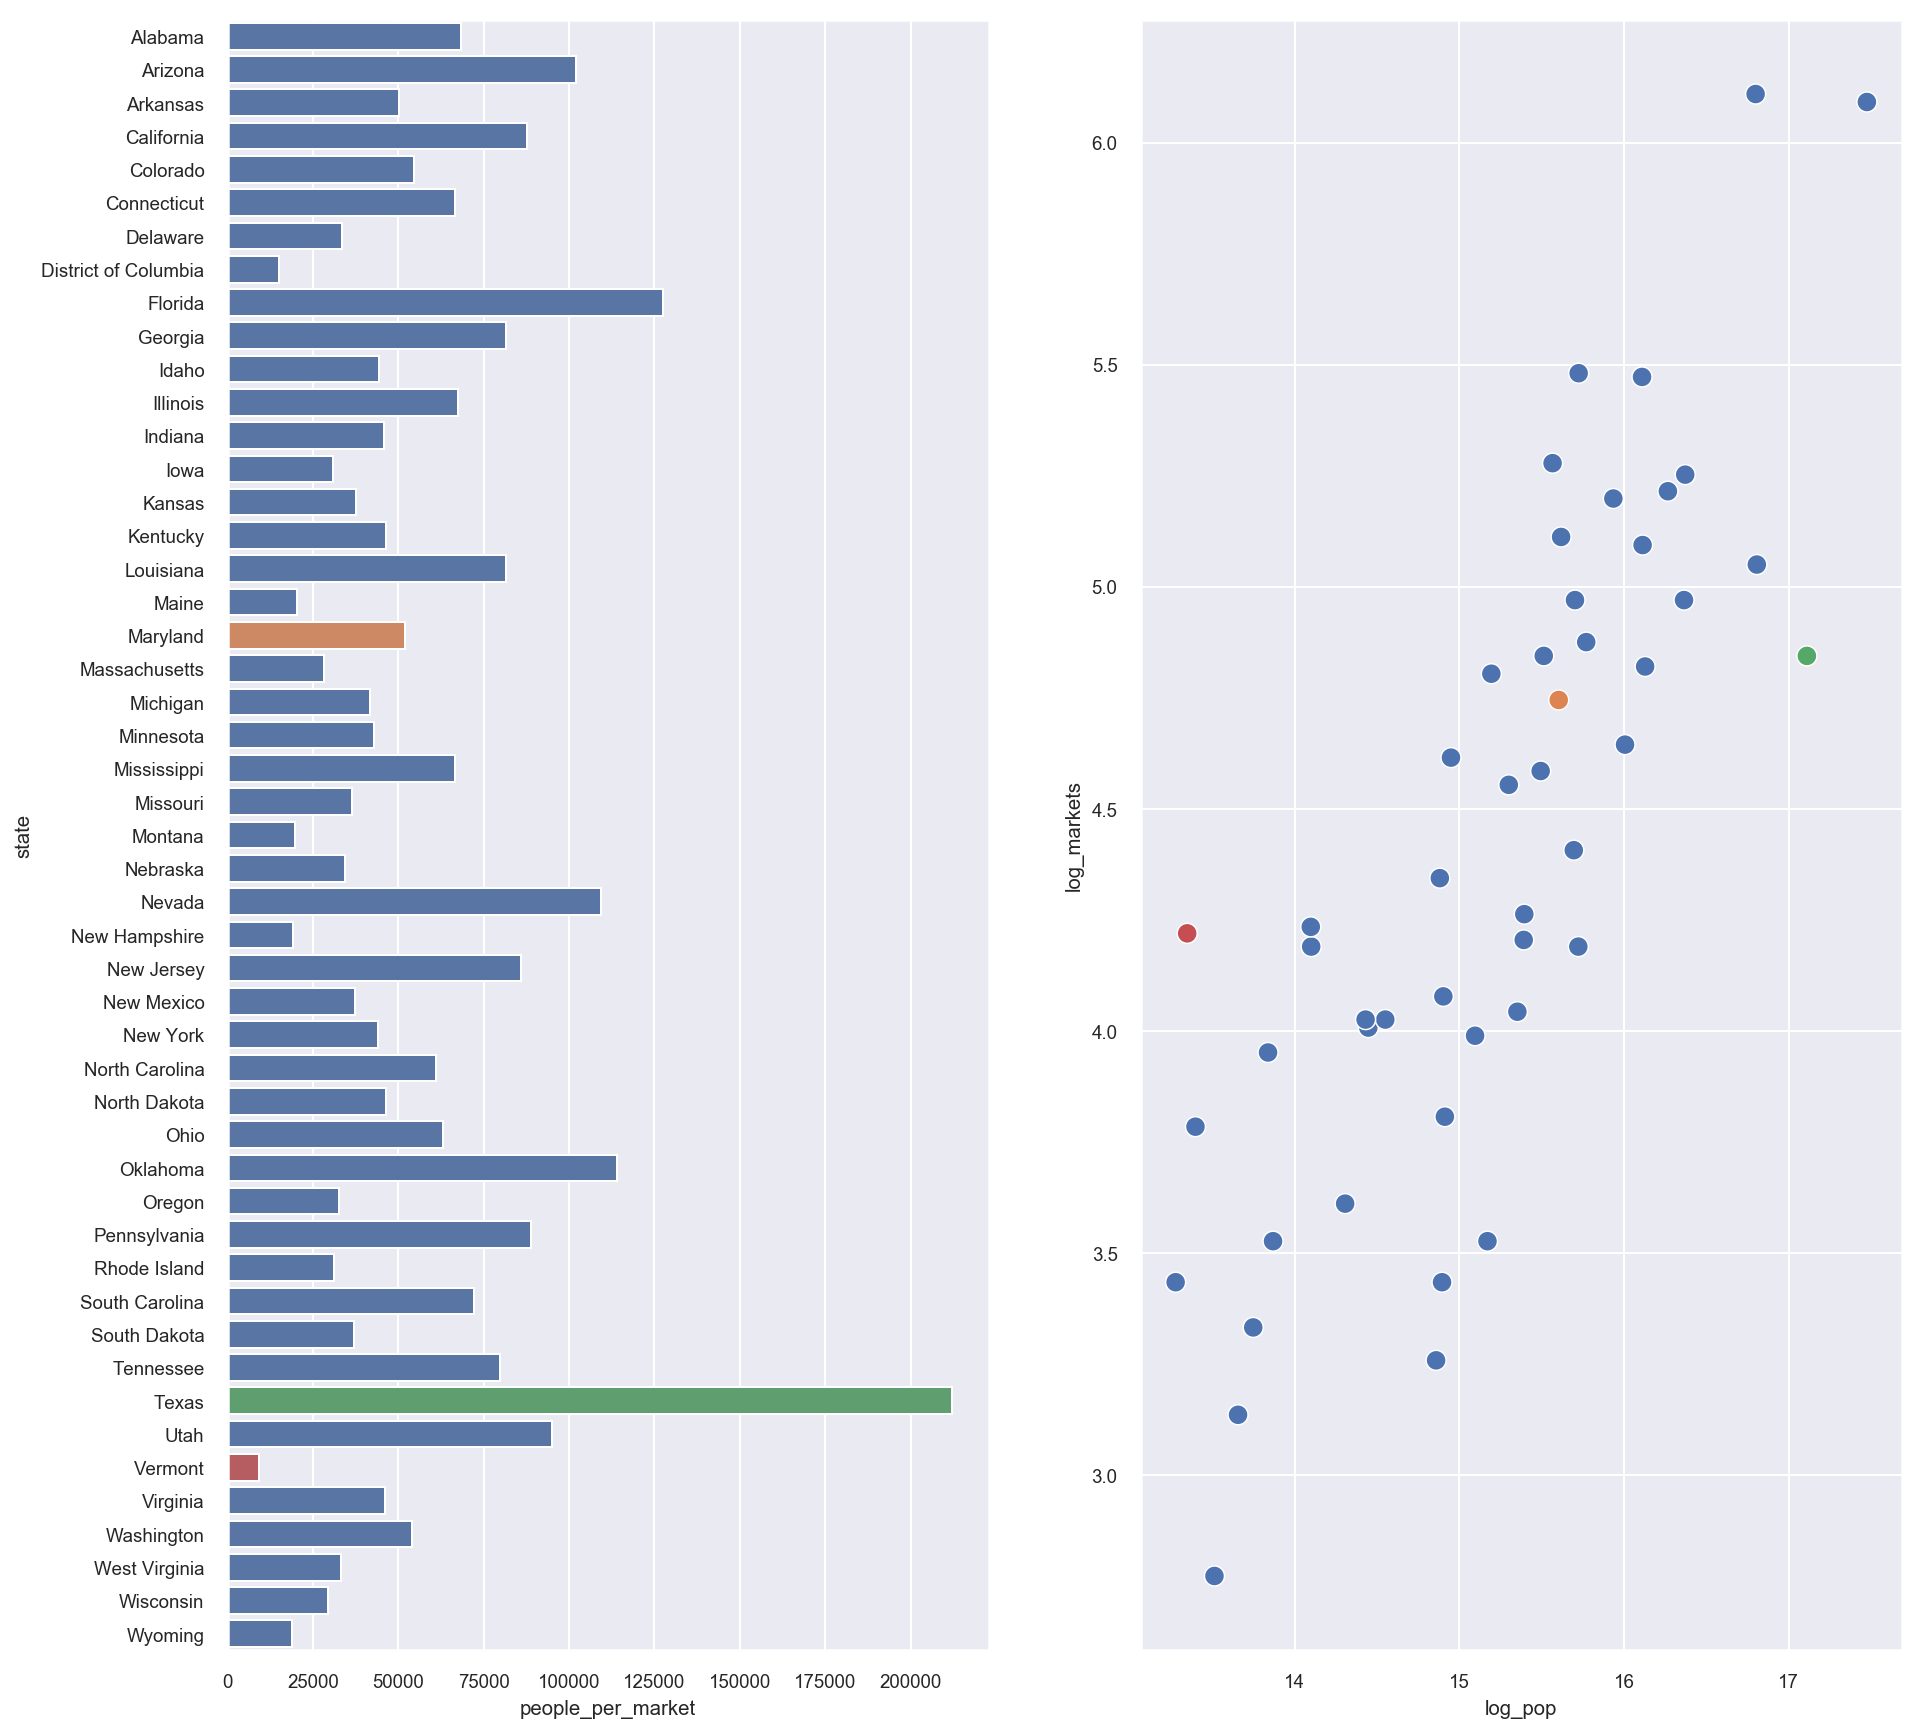

In [86]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 15))

sns.barplot('people_per_market', 'state', hue = 'is_selected',
            dodge = 0, data = markets_by_state, ax = ax1)

sns.scatterplot('log_pop', 'log_markets', hue = 'is_selected', 
                data = markets_by_state, ax = ax2, s = 100)

ax1.legend_.remove()
ax2.legend_.remove() 

ValueError: 'c' argument has 51 elements, which is not acceptable for use with 'x' with size 0, 'y' with size 0.

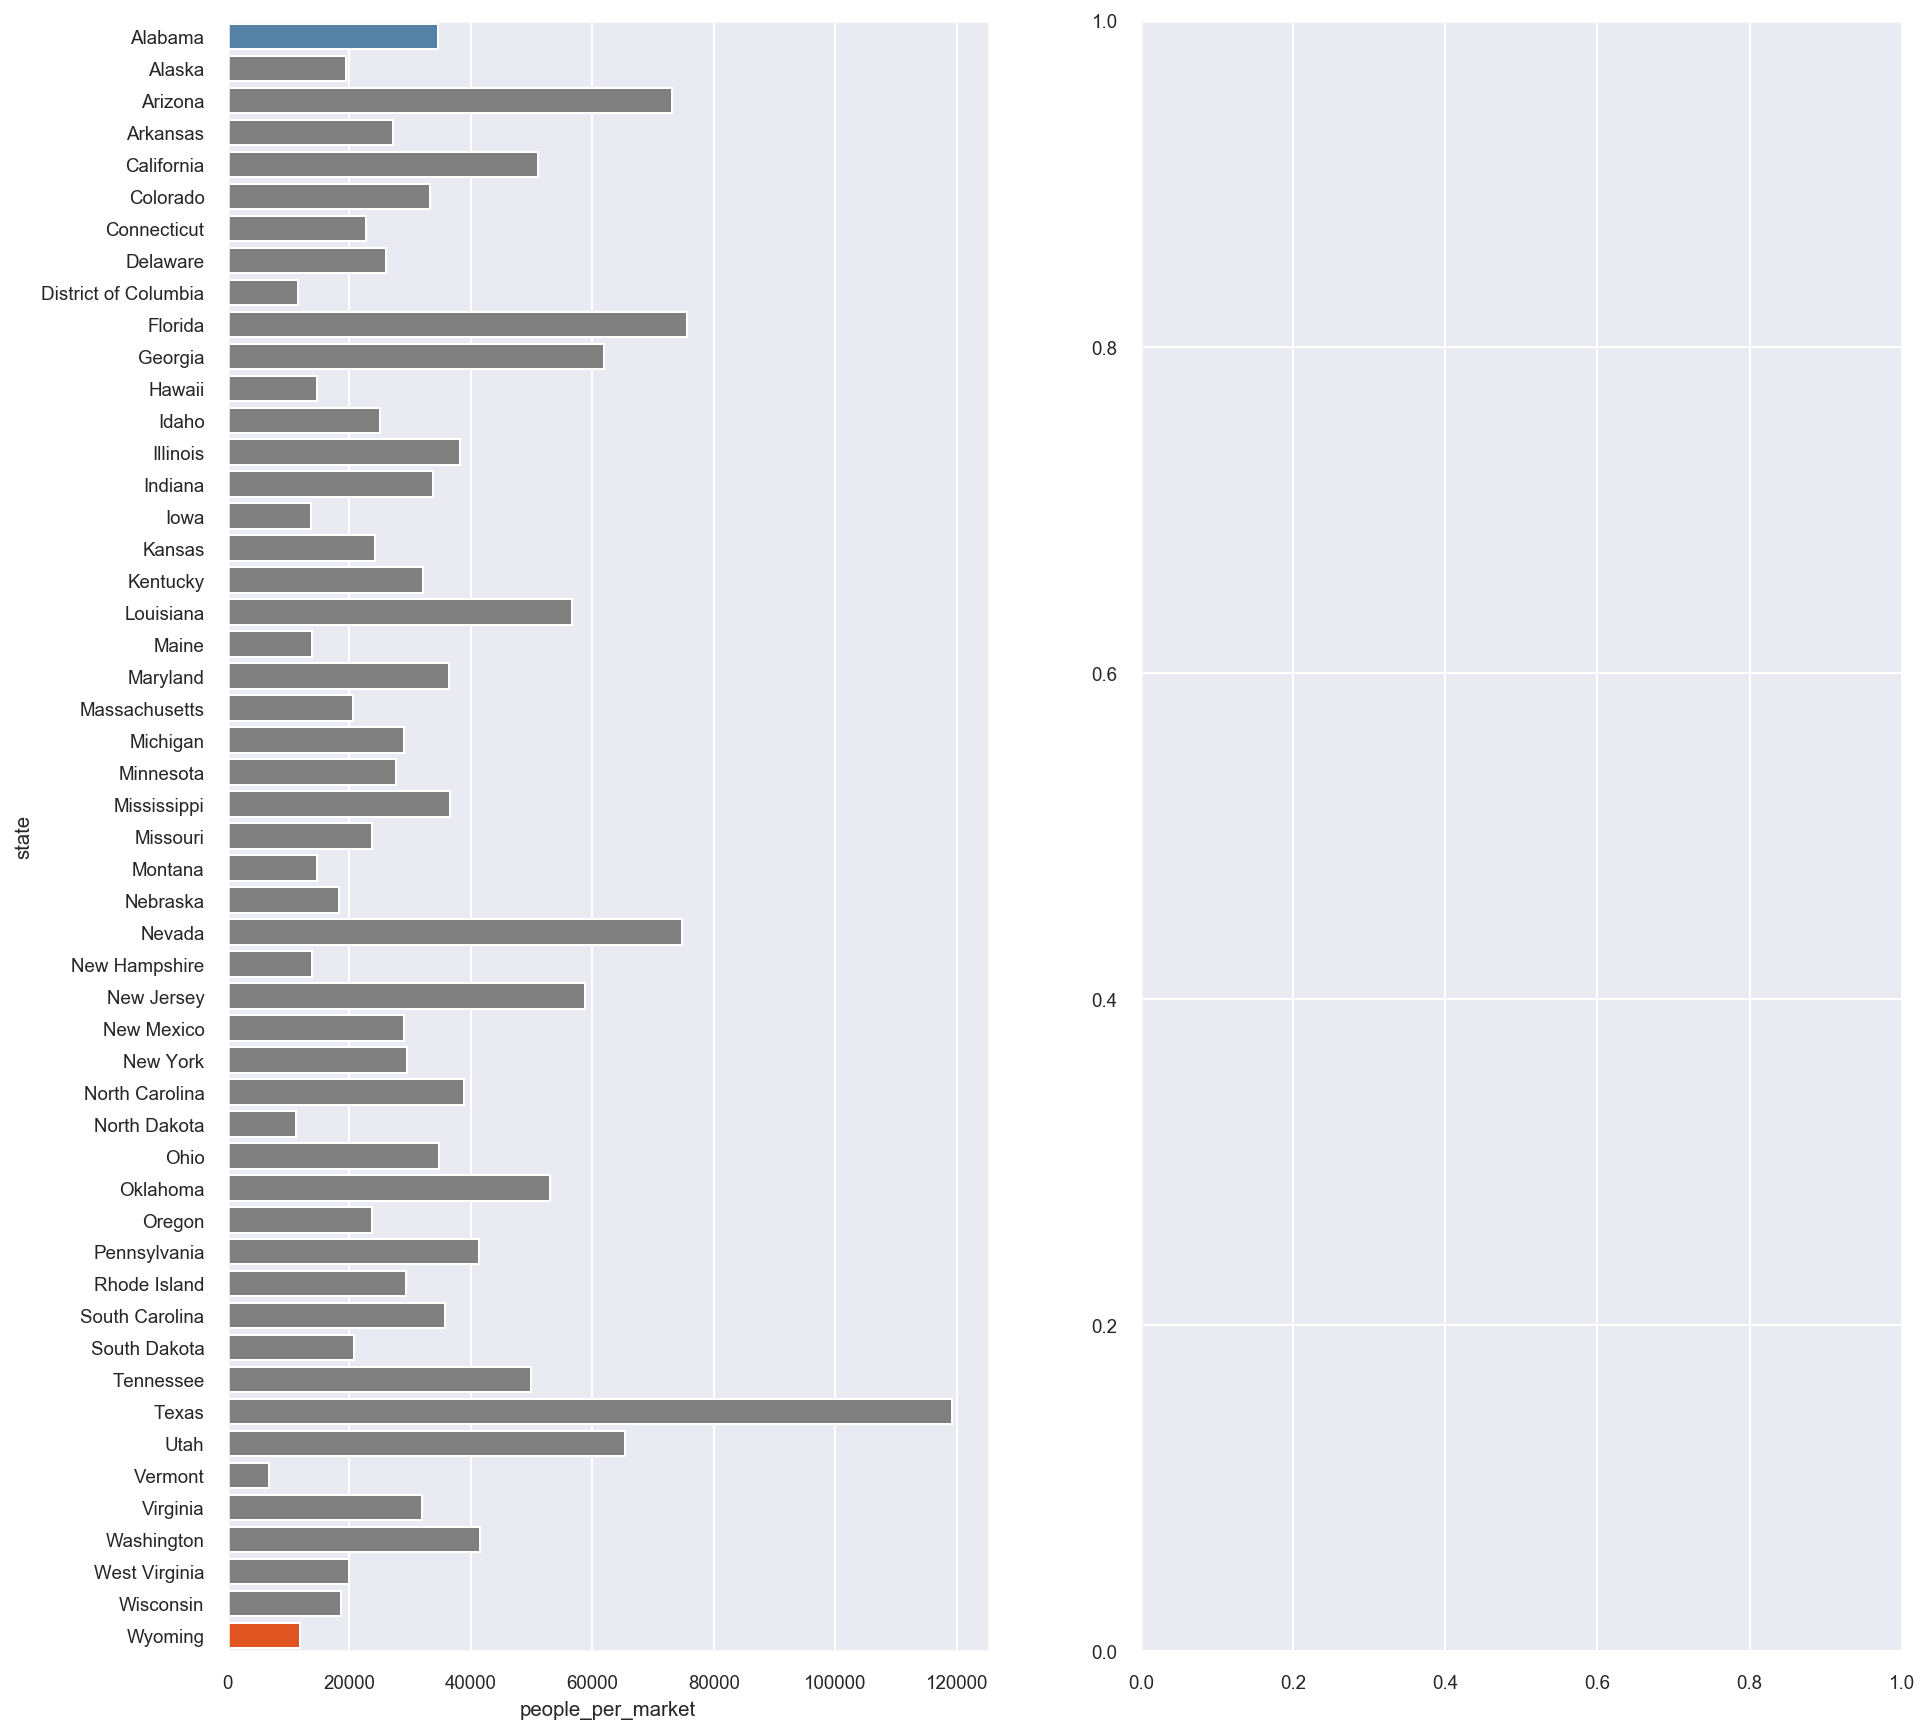

In [87]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 15))

sns.barplot('people_per_market', 'state', palette = state_colors,
            data = markets_by_state_2, ax = ax1)

p = sns.scatterplot('population', 'num_markets', color = state_colors,
                    data = markets_by_state_2, s = 60, ax = ax2)

ax2.set(xscale = 'log', yscale = 'log')

ax2.annotate(tx_message, xy = (26956958,230), 
             xytext = (26956958, 450), ha = 'right', 
             size = 15, backgroundcolor = 'white',
             arrowprops = {'facecolor':'black', 'width': 3})
sns.set_style('whitegrid')
plt.show()